# Imports

In [ ]:
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.stats as stats1
import matplotlib.pyplot as pyplot
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from scipy.stats import iqr
from sklearn.externals import joblib
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Loading dataset

In [ ]:
df_train_personal = pd.read_csv("personal_train.csv")
df_train_other = pd.read_csv("other_train.csv")

In [ ]:
df_train_personal.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [ ]:
df_train_other.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [ ]:
df_train_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3933 non-null   object
 1   address        3933 non-null   object
 2   age            3933 non-null   int64 
 3   sex            3933 non-null   object
 4   date_of_birth  3933 non-null   object
dtypes: int64(1), object(4)
memory usage: 153.8+ KB


In [ ]:
df_train_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   kurtosis_oxygen   3972 non-null   float64
 3   occupation        3968 non-null   object 
 4   pregnant          3969 non-null   object 
 5   education-num     3974 non-null   float64
 6   skewness_glucose  3972 non-null   float64
 7   mean_glucose      3362 non-null   object 
 8   std_oxygen        3964 non-null   float64
 9   capital-gain      3970 non-null   float64
 10  skewness_oxygen   3966 non-null   float64
 11  kurtosis_glucose  3969 non-null   float64
 12  personal_info     3967 non-null   object 
 13  fnlwgt            3970 non-null   float64
 14  class             3964 non-null   float64
 15  std_glucose       3972 non-null   float64
 16  income            3972 non-null   object 


In [ ]:
df_train =pd.merge(df_train_personal, df_train_other, on=["name", "address"])
df_train

,name,address,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,personal_info,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,01/12/1960,9.997593,Farming-fishing,FALSE,6.0,4.485091,69.2109375,18.201225,0.0,109.122306,2.024291,White|United-States\r\r\n10th -- Never-married...,180318.0,1.0,45.266166,<=50K,2.546823,35.0,0.0,Local-gov
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",51,Female,1968-02-02,15.740712,Sales,f,10.0,2.462325,83.0625,13.631787,0.0,262.107505,0.538981,White|United-States\r\r\nSome-college -- Never...,197552.0,0.0,36.782246,<=50K,0.964047,35.0,0.0,Private
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",60,Female,58-11-24,17.956806,Prof-specialty,t,12.0,-0.309684,128.2109375,11.326035,0.0,356.416627,0.222572,White|United-States\r\r\nAssoc-acdm -- Married...,109996.0,0.0,47.617889,<=50K,0.785117,40.0,0.0,Private
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",45,Male,04/04/1974,8.574385,Handlers-cleaners,f,7.0,3.534867,102.1484375,19.256217,3942.0,81.314811,0.539796,White|United-States\r\r\n11th -- Married-civ-s...,243569.0,0.0,31.689926,<=50K,2.738294,40.0,0.0,Private
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",70,Male,1948-12-01,2.078895,Transport-moving,f,9.0,26.479754,42.3671875,61.430430,0.0,3.451285,4.512225,Black|United-States\r\r\nHS-grad -- Never-marr...,154093.0,1.0,30.891157,<=50K,31.113712,40.0,0.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Clair Pinkleton,"8582 Lee Roads\r\nCostaburgh, SC 21897",55,Male,21/05/1964,2.463464,Transport-moving,f,9.0,28.059256,35.640625,53.782642,0.0,5.687234,4.800070,White|Mexico\r\r\nHS-grad -- Never-married|Unm...,604537.0,1.0,30.097948,<=50K,24.903010,40.0,0.0,Private
3979,William Pope,68430 Erik Terrace Suite 279\r\nPort Adamborou...,49,Male,1969-11-25,2.103614,Exec-managerial,f,13.0,12.347815,71.5859375,70.394893,0.0,2.836093,2.816974,White|United-States\r\r\nBachelors -- Married-...,312528.0,1.0,33.705185,<=50K,30.444816,37.0,0.0,State-gov
3980,Jared Kinsey,Unit 8416 Box 3801\r\nDPO AE 31166,48,Male,1971-08-29,9.299312,Machine-op-inspct,f,9.0,1.322426,105.9296875,16.980309,0.0,99.445536,0.633040,White|United-States\r\r\nHS-grad -- Married-ci...,155150.0,0.0,42.325964,<=50K,2.343645,40.0,0.0,Private
3981,Frederick Lawley,"34420 Brian Stream\r\nLake Michaeltown, MS 01832",68,Male,1951-01-08,11.438551,Sales,f,9.0,1.547406,90.4140625,13.059771,0.0,161.530238,0.473464,White|United-States\r\r\nHS-grad -- Divorced|N...,333108.0,0.0,40.192414,<=50K,1.508361,40.0,0.0,Private


# Cleaning and preprocessing dataset

### Duplicates

#### In the previous faze we have discovered that the dataset contains duplicate records of the same people, but some of the values there are missing.

In [ ]:
non_unique=(df_train['name'].value_counts()).to_dict()
non_unique_2=[]
for key in non_unique:
  if(non_unique[key]>1):
    non_unique_2+=[key]
non_unique_2  
non_unique_2= pd.DataFrame (non_unique_2,columns=['name'])
df_train[df_train["name"].isin(non_unique_2["name"])].sort_values("name")

,name,address,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,personal_info,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass
2347,Andrew Davis,"309 Roberts Shoal\r\nTeresatown, GA 39126",48,Female,1971/07/16,8.097738,NaN,f,12.0,0.081270,100.171875,23.767031,NaN,68.181397,0.428540,NaN,163003.0,0.0,-5175.575291,<=50K,3.240803,NaN,0.0,Private
2348,Andrew Davis,"309 Roberts Shoal\r\nTeresatown, GA 39126",48,Female,1971/07/16,8.097738,Prof-specialty,f,12.0,0.081270,100.171875,NaN,0.0,68.181397,0.428540,Asian-Pac-Islander|Philippines\r\r\nAssoc-acdm...,163003.0,0.0,-5175.575291,<=50K,3.240803,40.0,0.0,Private
1917,Andrew Vandre,"707 Larry Path Suite 878\r\nPort David, IN 13619",67,Male,1952-04-24,7.529901,Sales,f,NaN,-0.524892,120.046875,16.887024,0.0,72.420662,0.043663,White|United-States\r\r\nHS-grad -- Married-ci...,137142.0,0.0,50.486827,<=50K,NaN,60.0,0.0,Private
1916,Andrew Vandre,"707 Larry Path Suite 878\r\nPort David, IN 13619",67,Male,1952-04-24,7.529901,Sales,f,9.0,-0.524892,120.046875,NaN,0.0,72.420662,0.043663,White|United-States\r\r\nHS-grad -- Married-ci...,137142.0,0.0,50.486827,NaN,3.170569,NaN,0.0,Private
3063,Bob Smith,"93367 Stephanie Fields\r\nMaryhaven, ND 06660",58,Male,1961-02-16,10.420453,Craft-repair,f,9.0,0.459828,111.328125,15.333709,0.0,125.160229,0.056214,White|United-States\r\r\nHS-grad -- Married-ci...,328610.0,0.0,41.348766,<=50K,1.879599,40.0,0.0,Local-gov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,William Bostian,"PSC 5934, Box 4797\r\nAPO AA 12613",58,Male,01/10/1961,6.862217,Other-service,f,10.0,-0.194981,123.3125,27.485654,0.0,48.233903,0.303459,Black|United-States\r\r\nSome-college -- Never...,372483.0,0.0,48.287348,<=50K,4.402174,35.0,0.0,Private
1701,William Chicas,"646 Scott Hill Apt. 576\r\nWest Abigail, NE 35961",62,Male,1957-07-22,NaN,NaN,f,8.0,1.474550,NaN,14.344339,NaN,140.878300,-0.295259,NaN,423605.0,0.0,40.123575,>50K,NaN,40.0,1848.0,Local-gov
1700,William Chicas,"646 Scott Hill Apt. 576\r\nWest Abigail, NE 35961",62,Male,1957-07-22,11.050672,Transport-moving,f,8.0,1.474550,NaN,14.344339,0.0,140.878300,-0.295259,NaN,423605.0,0.0,40.123575,>50K,1.557692,40.0,1848.0,Local-gov
1958,William Hope,Unit 1906 Box 9918\r\nDPO AA 04281,68,Male,1951-08-27,9.199513,Handlers-cleaners,FALSE,4.0,0.209942,111.1953125,21.999341,0.0,88.173851,0.434319,White|United-States\r\r\n7th-8th -- Married-ci...,194189.0,1.0,44.152976,<=50K,2.652174,40.0,0.0,Private


#### That's why our first step will be merging these records to get more fullfilled information.

In [ ]:
filledgroups = df_train.groupby(["name", "address"]).apply(lambda x: x.ffill().bfill())
df_train = filledgroups
df_train

,name,address,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,personal_info,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,01/12/1960,9.997593,Farming-fishing,FALSE,6.0,4.485091,69.2109375,18.201225,0.0,109.122306,2.024291,White|United-States\r\r\n10th -- Never-married...,180318.0,1.0,45.266166,<=50K,2.546823,35.0,0.0,Local-gov
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",51,Female,1968-02-02,15.740712,Sales,f,10.0,2.462325,83.0625,13.631787,0.0,262.107505,0.538981,White|United-States\r\r\nSome-college -- Never...,197552.0,0.0,36.782246,<=50K,0.964047,35.0,0.0,Private
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",60,Female,58-11-24,17.956806,Prof-specialty,t,12.0,-0.309684,128.2109375,11.326035,0.0,356.416627,0.222572,White|United-States\r\r\nAssoc-acdm -- Married...,109996.0,0.0,47.617889,<=50K,0.785117,40.0,0.0,Private
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",45,Male,04/04/1974,8.574385,Handlers-cleaners,f,7.0,3.534867,102.1484375,19.256217,3942.0,81.314811,0.539796,White|United-States\r\r\n11th -- Married-civ-s...,243569.0,0.0,31.689926,<=50K,2.738294,40.0,0.0,Private
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",70,Male,1948-12-01,2.078895,Transport-moving,f,9.0,26.479754,42.3671875,61.430430,0.0,3.451285,4.512225,Black|United-States\r\r\nHS-grad -- Never-marr...,154093.0,1.0,30.891157,<=50K,31.113712,40.0,0.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Clair Pinkleton,"8582 Lee Roads\r\nCostaburgh, SC 21897",55,Male,21/05/1964,2.463464,Transport-moving,f,9.0,28.059256,35.640625,53.782642,0.0,5.687234,4.800070,White|Mexico\r\r\nHS-grad -- Never-married|Unm...,604537.0,1.0,30.097948,<=50K,24.903010,40.0,0.0,Private
3979,William Pope,68430 Erik Terrace Suite 279\r\nPort Adamborou...,49,Male,1969-11-25,2.103614,Exec-managerial,f,13.0,12.347815,71.5859375,70.394893,0.0,2.836093,2.816974,White|United-States\r\r\nBachelors -- Married-...,312528.0,1.0,33.705185,<=50K,30.444816,37.0,0.0,State-gov
3980,Jared Kinsey,Unit 8416 Box 3801\r\nDPO AE 31166,48,Male,1971-08-29,9.299312,Machine-op-inspct,f,9.0,1.322426,105.9296875,16.980309,0.0,99.445536,0.633040,White|United-States\r\r\nHS-grad -- Married-ci...,155150.0,0.0,42.325964,<=50K,2.343645,40.0,0.0,Private
3981,Frederick Lawley,"34420 Brian Stream\r\nLake Michaeltown, MS 01832",68,Male,1951-01-08,11.438551,Sales,f,9.0,1.547406,90.4140625,13.059771,0.0,161.530238,0.473464,White|United-States\r\r\nHS-grad -- Divorced|N...,333108.0,0.0,40.192414,<=50K,1.508361,40.0,0.0,Private


In [ ]:
non_unique=(df_train['name'].value_counts()).to_dict()
non_unique_2=[]
for key in non_unique:
  if(non_unique[key]>1):
    non_unique_2+=[key]
non_unique_2  
non_unique_2= pd.DataFrame (non_unique_2,columns=['name'])
df_train[df_train["name"].isin(non_unique_2["name"])].sort_values("name")

,name,address,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,personal_info,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass
2347,Andrew Davis,"309 Roberts Shoal\r\nTeresatown, GA 39126",48,Female,1971/07/16,8.097738,Prof-specialty,f,12.0,0.081270,100.171875,23.767031,0.0,68.181397,0.428540,Asian-Pac-Islander|Philippines\r\r\nAssoc-acdm...,163003.0,0.0,-5175.575291,<=50K,3.240803,40.0,0.0,Private
2348,Andrew Davis,"309 Roberts Shoal\r\nTeresatown, GA 39126",48,Female,1971/07/16,8.097738,Prof-specialty,f,12.0,0.081270,100.171875,23.767031,0.0,68.181397,0.428540,Asian-Pac-Islander|Philippines\r\r\nAssoc-acdm...,163003.0,0.0,-5175.575291,<=50K,3.240803,40.0,0.0,Private
1917,Andrew Vandre,"707 Larry Path Suite 878\r\nPort David, IN 13619",67,Male,1952-04-24,7.529901,Sales,f,9.0,-0.524892,120.046875,16.887024,0.0,72.420662,0.043663,White|United-States\r\r\nHS-grad -- Married-ci...,137142.0,0.0,50.486827,<=50K,3.170569,60.0,0.0,Private
1916,Andrew Vandre,"707 Larry Path Suite 878\r\nPort David, IN 13619",67,Male,1952-04-24,7.529901,Sales,f,9.0,-0.524892,120.046875,16.887024,0.0,72.420662,0.043663,White|United-States\r\r\nHS-grad -- Married-ci...,137142.0,0.0,50.486827,<=50K,3.170569,60.0,0.0,Private
3063,Bob Smith,"93367 Stephanie Fields\r\nMaryhaven, ND 06660",58,Male,1961-02-16,10.420453,Craft-repair,f,9.0,0.459828,111.328125,15.333709,0.0,125.160229,0.056214,White|United-States\r\r\nHS-grad -- Married-ci...,328610.0,0.0,41.348766,<=50K,1.879599,40.0,0.0,Local-gov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,William Bostian,"PSC 5934, Box 4797\r\nAPO AA 12613",58,Male,01/10/1961,6.862217,Other-service,f,10.0,-0.194981,123.3125,27.485654,0.0,48.233903,0.303459,Black|United-States\r\r\nSome-college -- Never...,372483.0,0.0,48.287348,<=50K,4.402174,35.0,0.0,Private
1701,William Chicas,"646 Scott Hill Apt. 576\r\nWest Abigail, NE 35961",62,Male,1957-07-22,11.050672,Transport-moving,f,8.0,1.474550,NaN,14.344339,0.0,140.878300,-0.295259,NaN,423605.0,0.0,40.123575,>50K,1.557692,40.0,1848.0,Local-gov
1700,William Chicas,"646 Scott Hill Apt. 576\r\nWest Abigail, NE 35961",62,Male,1957-07-22,11.050672,Transport-moving,f,8.0,1.474550,NaN,14.344339,0.0,140.878300,-0.295259,NaN,423605.0,0.0,40.123575,>50K,1.557692,40.0,1848.0,Local-gov
1958,William Hope,Unit 1906 Box 9918\r\nDPO AA 04281,68,Male,1951-08-27,9.199513,Handlers-cleaners,FALSE,4.0,0.209942,111.1953125,21.999341,0.0,88.173851,0.434319,White|United-States\r\r\n7th-8th -- Married-ci...,194189.0,1.0,44.152976,<=50K,2.652174,40.0,0.0,Private


In [ ]:
df_train.drop_duplicates(inplace=True)
df_train = df_train.reset_index(drop=True)
df_train[df_train["name"].isin(non_unique_2["name"])].sort_values("name")

,name,address,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,personal_info,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass
2316,Andrew Davis,"309 Roberts Shoal\r\nTeresatown, GA 39126",48,Female,1971/07/16,8.097738,Prof-specialty,f,12.0,0.081270,100.171875,23.767031,0.0,68.181397,0.428540,Asian-Pac-Islander|Philippines\r\r\nAssoc-acdm...,163003.0,0.0,-5175.575291,<=50K,3.240803,40.0,0.0,Private
1893,Andrew Vandre,"707 Larry Path Suite 878\r\nPort David, IN 13619",67,Male,1952-04-24,7.529901,Sales,f,9.0,-0.524892,120.046875,16.887024,0.0,72.420662,0.043663,White|United-States\r\r\nHS-grad -- Married-ci...,137142.0,0.0,50.486827,<=50K,3.170569,60.0,0.0,Private
3020,Bob Smith,"93367 Stephanie Fields\r\nMaryhaven, ND 06660",58,Male,1961-02-16,10.420453,Craft-repair,f,9.0,0.459828,111.328125,15.333709,0.0,125.160229,0.056214,White|United-States\r\r\nHS-grad -- Married-ci...,328610.0,0.0,41.348766,<=50K,1.879599,40.0,0.0,Local-gov
410,Caleb Eldridge,"PSC 3663, Box 7668\r\nAPO AA 91149",60,Male,1959-07-05 00 00 00,-0.940689,Machine-op-inspct,f,9.0,-0.550702,NaN,63.874084,0.0,-0.899902,0.023551,White|United-States\r\r\nHS-grad -- Never-marr...,243240.0,0.0,55.014025,<=50K,104.427257,37.0,0.0,Private
265,Carl Dunn,"453 Clayton Harbor Suite 489\r\nPort Melissa, ...",32,Male,15/10/1987,15.085389,Prof-specialty,f,13.0,-0.334782,116.0078125,11.043418,0.0,282.164681,0.371670,White|United-States\r\r\nBachelors -- Married-...,219546.0,0.0,54.415143,>50K,NaN,40.0,0.0,Private
2829,Carlos Coffee,"87970 Eric Trail\r\nReginaside, RI 41013",38,Female,1981-09-11,2.840049,Prof-specialty,f,15.0,11.221619,60.9296875,58.381295,0.0,7.562942,2.631293,White|United-States\r\r\nProf-school -- Marrie...,112763.0,1.0,32.919927,>50K,28.295987,40.0,0.0,Private
1210,Charlie Moran,"279 Ryan Plain Apt. 471\r\nNorth Carlaland, SD...",65,Male,1954-03-15,8.027972,Prof-specialty,f,13.0,1.442020,94.109375,20.622529,20051.0,69.264163,0.624453,White|United-States\r\r\nBachelors -- Married-...,113323.0,0.0,40.963443,>50K,2.962375,40.0,0.0,Private
2812,Craig Brown,"149 Melissa Track Apt. 896\r\nRachelville, AR ...",43,Male,1976-05-06,7.131043,Exec-managerial,f,13.0,0.303048,122.15625,17.268061,0.0,65.171174,0.038635,White|United-States\r\r\nBachelors -- Married-...,160472.0,0.0,48.620250,>50K,3.382107,50.0,1977.0,Local-gov
3202,Craig Mcswain,USS Griffin\r\nFPO AA 37351,47,Female,72-10-11,5.606383,Tech-support,FALSE,14.0,0.206970,105.3125,26.727886,0.0,33.105728,0.324693,White|United-States\r\r\nMasters -- Separated|...,186420.0,0.0,44.397310,<=50K,5.209866,25.0,0.0,Self-emp-not-inc
954,Daniel Lackey,06855 Brandon Mountains Apt. 703\r\nSmithmouth...,51,Male,68-09-20,11.182485,Craft-repair,f,7.0,0.242227,121.5,14.873960,0.0,143.116217,0.131234,White|Cuba\r\r\n11th -- Married-civ-spouse|Hus...,240859.0,0.0,43.900100,<=50K,1.623746,40.0,0.0,Private


#### Now the dataset has no duplicates

### Inconsistent datetime format

#### As we can see above one of the problem is inconsistent date format, for example: 1968-02-02, 58-11-24, etc. 

In [ ]:
 df_train['date_of_birth'].describe

<bound method NDFrame.describe of 0       01/12/1960
1       1968-02-02
2         58-11-24
3       04/04/1974
4       1948-12-01
           ...    
3928    21/05/1964
3929    1969-11-25
3930    1971-08-29
3931    1951-01-08
3932    09/08/1966
Name: date_of_birth, Length: 3933, dtype: object>

#### We have to change all the data, so the column "date_of_birth" has one format.

In [ ]:
df_train.date_of_birth = df_train.date_of_birth.apply(lambda x: pd.to_datetime(x[:10], yearfirst=True).strftime('%d/%m/%Y'))
arr = df_train.date_of_birth.unique()
for i in range(0, len(arr)):
  if(i% 500 == 0):
    print()
  print(arr[i], end=" ")


12/01/1960 02/02/1968 24/11/2058 04/04/1974 01/12/1948 24/09/1971 16/10/1952 05/02/1963 19/06/1970 12/03/1975 28/01/1975 01/03/1983 29/07/1970 19/01/1967 04/09/1957 17/10/1969 19/11/1978 14/02/1967 29/03/2066 23/04/1946 06/01/1966 18/06/2066 26/10/1968 01/05/1964 30/04/1975 18/02/1960 19/08/1976 02/12/1955 02/08/1960 28/08/1964 23/03/1939 25/06/1958 14/11/1959 21/04/1981 09/11/1991 06/02/1961 16/05/1989 15/06/1956 15/09/1957 17/01/1973 12/12/1968 20/11/1997 13/03/1984 13/02/1974 09/12/1971 05/04/1975 14/07/1970 18/09/1987 27/12/1962 12/03/1941 16/08/1971 01/07/1920 03/07/2061 23/01/2002 07/12/1964 12/06/1960 10/12/1965 03/10/1969 07/07/1964 27/08/1946 02/06/1974 15/01/1968 21/11/1934 13/12/1975 23/10/1974 01/02/1958 26/04/1990 13/07/1978 05/01/1964 11/03/1973 03/03/2069 11/07/1972 05/04/1967 19/10/1977 26/03/1958 10/09/1959 03/08/1954 09/12/2064 23/08/1966 20/09/1964 05/12/1938 14/06/1950 02/05/1978 31/05/1960 17/01/1964 10/02/1959 09/01/1978 20/02/1976 23/12/1969 28/10/1973 30/04/196

#### The transformation above caused other problems, and that is the dates from the future, for example '24/11/ 2058'. It was caused because of an origin format '58-11-24', which most likely should have been transformed to '24/11/ 1958'. That's why the following step will be to substract 100 years from the dates, which haven't been yet.

In [ ]:
df_train.age.min()

-1

#### Based on the above observation, we can say that the origin year is 2018 that's why we will substract 100 years only from dates after 01/01/ 2018

In [ ]:
def future_date(x):
  # print(x)

  if (pd.to_datetime(x) > pd.to_datetime('01/01/2018')):
    return (pd.to_datetime(x)-pd.DateOffset(years=100)).strftime('%d/%m/%Y')
  else:
    return x


In [ ]:
df_train.date_of_birth=df_train.date_of_birth.apply(future_date)
df_train[df_train["age"]<=0]

,name,address,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,personal_info,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass
3918,Hector Kenny,"54278 Kyle Lock Suite 612\r\nLeonfurt, MO 81951",-1,Female,11/01/1919,4.928024,Other-service,t,6.0,-0.065705,135.1640625,29.791218,0.0,25.839414,-0.016696,White|United-States\r\r\n10th -- Never-married...,383603.0,0.0,50.852541,<=50K,6.810201,35.0,0.0,Private


#### Now it's time to clean the data, which represents age due to new date_of_birth values. But this time we don't have to count at what time the dataset was created. That means we can use current year.

In [ ]:
now = pd.to_datetime('now')
df_train.age =(now - pd.to_datetime(df_train.date_of_birth)).astype('<m8[Y]').astype("int64")
df_train.age.unique()


array([ 59,  52,  62,  46,  72,  49,  68,  57,  50,  44,  45,  37,  53,
        63,  51,  42,  54,  74,  56,  60,  65,  81,  61,  39,  29,  31,
        64,  47,  23,  36,  33,  78, 100,  18,  55,  86,  30,  48,  43,
        66,  82,  70,  75,  71,  28,  58,  27,  38,  69,  77,  40,  22,
        25,  76,  41,  21,  35,  73,  67,  32,  34,  79,  24,  88,   4,
        84,  80,  17,  26,  20,  83,  85,  19,  10,  98,  16,  87, 114,
        91,  94,  13,  15,   9, 101])

### Gender

#### As we can see, the column "sex" has a wrong format, because it starts with a space. We are going to change it.

In [ ]:
df_train.sex.unique()

array([' Male', ' Female'], dtype=object)

In [ ]:
df_train.sex = df_train.sex.apply(lambda x: x[1:])

In [ ]:
df_train.sex.unique()

array(['Male', 'Female'], dtype=object)

### Pregnancy

#### In the previous faze we have discovered that column which tells us whether the person is pregnant or not is also inconsistent. As the column might only have two values, we will change it to boolen type.

In [ ]:
non_unique=(df_train['pregnant'].value_counts()).to_dict()
non_unique

{'F': 192, 'FALSE': 197, 'T': 3, 'TRUE': 1, 'f': 3486, 't': 54}

In [ ]:
df_train.pregnant = df_train.pregnant.replace(['F', 'FALSE', 'f'], False)
df_train.pregnant = df_train.pregnant.replace(['T', 'TRUE', 't'], True)

In [ ]:
df_train.pregnant.unique()

array([False,  True])

#### Next problem is that the data is not true, for example the dataset contains records of male people, which are pregnant. So we will replace the value of pregnacy column with false.

In [ ]:
df_train[df_train["sex"]=='Male'][df_train["pregnant"]==True]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,name,address,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,personal_info,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass
78,Gerald Snyder,"025 Scott Bridge\r\nNorth Lisaland, SC 56944",54,Male,23/08/1966,6.157715,Craft-repair,True,11.0,0.331799,162.15625,23.669017,0.0,42.992849,-0.473335,White|United-States\r\r\nAssoc-voc -- Divorced...,122749.0,0.0,47.838994,<=50K,4.918060,20.0,0.0,Self-emp-not-inc
153,Bill Pena,442 Sabrina Corners Apt. 314\r\nNorth Brittany...,59,Male,29/11/1960,-1.002570,Prof-specialty,True,13.0,1.538289,81.71875,80.765608,0.0,-0.280001,1.482041,White|United-States\r\r\nBachelors -- Never-ma...,233275.0,1.0,52.875286,<=50K,170.656354,45.0,0.0,Private
507,Nick Fried,Unit 9169 Box 4422\r\nDPO AP 27992,44,Male,06/01/1976,13.139423,Adm-clerical,True,10.0,1.282839,NaN,13.826210,0.0,192.701290,0.738614,White|United-States\r\r\nSome-college -- Divor...,389725.0,0.0,-4414.720360,<=50K,1.270903,45.0,0.0,Private
1038,Anthony Yarbrough,1801 Abigail Extension Suite 623\r\nNancymouth...,51,Male,14/05/1969,9.670377,Adm_clerical,True,11.0,-0.563534,114.578125,13.466243,0.0,129.106383,0.308273,White|United-States\r\r\nAssoc-voc -- Married-...,212120.0,0.0,57.853210,>50K,2.221572,40.0,0.0,Federal-gov
1587,Daniel Pascual,"PSC 3047, Box 8365\r\nAPO AP 19155",51,Male,29/07/1969,8.348104,Tech-support,True,9.0,-0.051165,131.2578125,16.589801,0.0,83.531610,-0.047126,White|United-States\r\r\nHS-grad -- Married-ci...,192982.0,0.0,49.719879,>50K,2.541806,40.0,1848.0,Private
1670,Craig Reed,"8834 Kimberly Manors\r\nNew Jamietown, MO 61308",66,Male,02/12/1954,9.718908,Sales,True,13.0,-0.059455,NaN,16.888774,0.0,105.502900,0.203980,White|United-States\r\r\nBachelors -- Never-ma...,190391.0,0.0,51.359719,<=50K,2.166388,40.0,0.0,Private
1970,John Jolicoeur,"0139 Christopher Valley\r\nEast Ashleyborough,...",55,Male,21/08/1965,3.507107,Protective-serv,True,10.0,11.648524,65.9375,43.578305,0.0,12.855779,2.772095,Other|United-States\r\r\nSome-college -- Marri...,271521.0,1.0,35.339812,>50K,15.684783,40.0,0.0,Local-gov
2792,Andre Mcdonald,"448 Miller Ports\r\nLake Samuel, FL 25888",45,Male,26/04/1975,13.790790,Other-service,True,6.0,-0.412612,NaN,12.717024,0.0,223.762670,0.305496,White|United-States\r\r\n10th -- Never-married...,99161.0,0.0,56.188825,<=50K,1.320234,8.0,0.0,Private
2990,Joshua Lewis,"5980 Stevens Turnpike Apt. 793\r\nFarmerside, ...",52,Male,29/11/1967,15.301575,Prof-specialty,True,15.0,0.506103,129.703125,11.697509,0.0,277.108433,0.082524,White|United-States\r\r\nProf-school -- Marrie...,297248.0,0.0,43.531842,>50K,1.105351,45.0,2415.0,Local-gov
3240,Johnathon Maier,"83956 Rivera Fall\r\nAliciastad, VA 57310",54,Male,16/03/1966,-2.282560,Machine-op-inspct,True,6.0,-1.282344,120.046875,29.422248,0.0,8.222575,0.161219,White|United-States\r\r\n10th -- Married-civ-s...,206232.0,0.0,68.926915,<=50K,197.577759,50.0,0.0,Private


In [ ]:
df_train.loc[df_train["sex"]=='Male', "pregnant"] = False

### Now let's move on to the metrics of glucose and oxygen

#### The corelated value will always be "class", becuse it defines whether the preson has or doesn't have a disease.

#### We will go through the columns in the same order they are in the dataset.

In [ ]:
df_train.kurtosis_oxygen.describe()

count    3933.000000
mean        7.413506
std         4.812170
min        -2.597872
25%         3.637833
50%         7.782188
75%        10.261581
max        34.539844
Name: kurtosis_oxygen, dtype: float64

#### The column kurtosis_oxygen has no null values.

In [ ]:
df_train.kurtosis_oxygen.isnull().sum()

0

In [ ]:
df_train.skewness_glucose.describe()

count    3933.000000
mean        4.218732
std         9.678151
min        -1.755332
25%        -0.119966
50%         0.373828
75%         2.081514
max        68.101622
Name: skewness_glucose, dtype: float64

#### The column skewness_glucose has no null values too.

In [ ]:
df_train.skewness_glucose.isnull().sum()

0

In [ ]:
df_train.mean_glucose.describe()

count     3334
unique    2799
top         ??
freq       110
Name: mean_glucose, dtype: object

#### The column mean_glucose is a string type, so the first thing we will do is convert it to float type.

In [ ]:
def str_to_float(x):
  try:
    return float(x)
  except ValueError:
    return np.nan

df_train.mean_glucose =df_train.mean_glucose.apply(str_to_float)
arr = df_train.mean_glucose.unique()
for i in range(0, len(arr)):
  if(i% 500 == 0):
    print()
  print(arr[i], end=" ")


69.2109375 83.0625 128.2109375 102.1484375 42.3671875 131.0390625 114.1171875 nan 64.5078125 129.234375 140.671875 38.9921875 137.9609375 96.3125 112.1015625 113.890625 116.375 18.921875 97.84375 120.9765625 98.375 95.515625 101.3046875 42.5078125 118.8828125 58.2890625 111.8828125 104.578125 22.7578125 30.0546875 130.9375 140.0234375 120.671875 136.8828125 96.015625 124.4296875 122.6171875 46.2421875 124.640625 79.7265625 90.078125 110.0703125 57.90625 94.0625 151.6953125 80.8515625 105.625 102.3203125 47.203125 112.2734375 117.0234375 97.3125 124.0390625 118.171875 117.296875 124.171875 110.265625 144.328125 149.8671875 19.8359375 91.3515625 36.0625 138.546875 162.15625 98.78125 67.5625 151.9453125 88.546875 86.5390625 148.8125 127.140625 146.2265625 112.4453125 112.796875 149.421875 123.5625 56.6171875 56.734375 132.3359375 101.7109375 121.515625 66.4921875 144.1328125 134.0234375 85.3046875 124.546875 129.0 135.640625 129.96875 102.8671875 103.78125 96.28125 23.734375 135.0078125 

In [ ]:
df_train.mean_glucose.describe()

count    3185.000000
mean      100.772650
std        33.789572
min         6.187500
25%        87.070312
50%       110.476562
75%       123.937500
max       189.734375
Name: mean_glucose, dtype: float64

#### The column mean_glucose has null values. In order to create a better model we should replace np.nan with some values. In this case we would like to use a simple importer with "mean" strategy.

In [ ]:
df_train.mean_glucose.isnull().sum()

748

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
x_t = imp_mean.fit_transform(df_train[["mean_glucose", "class"]])
df_train["mean_glucose"]=x_t[:,0]
df_train.mean_glucose.describe()

count    3933.000000
mean      100.772650
std        30.406222
min         6.187500
25%        94.523438
50%       101.773438
75%       120.476562
max       189.734375
Name: mean_glucose, dtype: float64

In [ ]:
df_train.std_oxygen.describe()

count    3932.000000
mean       31.158165
std        22.268066
min         7.370432
25%        15.041333
50%        20.579902
75%        43.229414
max       110.642211
Name: std_oxygen, dtype: float64

#### The column std_oxygen also has a null values. This time we will use "median" strategy.

In [ ]:
df_train.std_oxygen.isnull().sum()

1

In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
x_t = imp_median.fit_transform(df_train[["std_oxygen", "class"]])
df_train["std_oxygen"]=x_t[:,0]
df_train.std_oxygen.describe()

count    3933.000000
mean       31.155475
std        22.265874
min         7.370432
25%        15.041549
50%        20.579902
75%        43.221350
max       110.642211
Name: std_oxygen, dtype: float64

In [ ]:
df_train.skewness_oxygen.describe()

count    3932.000000
mean       91.296409
std       108.565726
min        -1.976976
25%        12.863954
50%        68.476815
75%       127.017151
max      1191.000837
Name: skewness_oxygen, dtype: float64

#### The column std_oxygen also has a null values. This time we will use "most_frequent" strategy.

In [ ]:
df_train.skewness_oxygen.isnull().sum()

1

In [ ]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x_t = imp_most_frequent.fit_transform(df_train[["skewness_oxygen", "class"]])
df_train["skewness_oxygen"]=x_t[:,0]
df_train.skewness_oxygen.describe()

count    3933.000000
mean       91.272693
std       108.562108
min        -1.976976
25%        12.855779
50%        68.463157
75%       127.012005
max      1191.000837
Name: skewness_oxygen, dtype: float64

In [ ]:
df_train.kurtosis_glucose.describe()

count    3932.000000
mean        0.951368
std         1.611166
min        -1.641515
25%         0.072000
50%         0.310578
75%         0.777223
max         8.069522
Name: kurtosis_glucose, dtype: float64

#### The column std_oxygen also has null values. This time we will use "mean" strategy.

In [ ]:
df_train.kurtosis_glucose.isnull().sum()

1

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
x_t = imp_mean.fit_transform(df_train[["kurtosis_glucose", "class"]])
df_train["kurtosis_glucose"]=x_t[:,0]
df_train.kurtosis_glucose.describe()

count    3933.000000
mean        0.951368
std         1.610961
min        -1.641515
25%         0.072144
50%         0.310784
75%         0.778607
max         8.069522
Name: kurtosis_glucose, dtype: float64

In [ ]:
df_train.std_glucose.describe()

count    3933.000000
mean       12.142078
std      1448.788983
min     -6123.419559
25%        39.192356
50%        45.820717
75%        50.985933
max      7861.980806
Name: std_glucose, dtype: float64

#### The column std_oxygen has no null values.

In [ ]:
df_train.std_glucose.isnull().sum()

0

In [ ]:
df_train.mean_oxygen.describe()

count    3932.000000
mean       18.481169
std        34.792534
min         0.213211
25%         2.065217
50%         3.236622
75%        12.635452
max       217.371238
Name: mean_oxygen, dtype: float64

#### The column std_oxygen has null values. This time we will use KNN Imputation.

In [ ]:
df_train.mean_oxygen.isnull().sum()

1

In [ ]:
KNN_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [ ]:
X_t =KNN_imputer.fit_transform(df_train[['mean_oxygen', 'class']])
df_train.mean_oxygen=X_t[:,0]

#### For all other data(text data) we will use "most-frequent" strategy.

#### Column occupation has values " ?" and np.nan, we are going to remove them

In [ ]:
df_train["occupation"].unique()

array([' Farming-fishing', ' Sales', ' Prof-specialty',
       ' Handlers-cleaners', ' Transport-moving', ' Craft-repair',
       ' Prof_specialty', ' Other-service', ' ?', ' Craft_repair',
       ' Adm-clerical', ' Machine-op-inspct', ' Exec-managerial',
       ' Transport_moving', ' Other_service', ' Tech-support',
       ' Protective-serv', ' Protective_serv', ' Handlers_cleaners',
       ' Exec_managerial', ' Adm_clerical', ' Priv-house-serv',
       ' Tech_support', ' Machine_op_inspct', ' Farming_fishing',
       ' Priv_house_serv', ' Armed-Forces'], dtype=object)

In [ ]:
df_train["occupation"].describe()

count                3933
unique                 27
top        Prof-specialty
freq                  455
Name: occupation, dtype: object

In [ ]:
def float_to_str(x):
  try:
    return str(x)
  except ValueError:
    return "  "

occupation =df_train.occupation.apply(float_to_str)
occupation =occupation.replace('nan', " nan")
occupation =occupation.apply(lambda x: x[1:])
occupation =occupation.replace('?', np.nan)
occupation =occupation.replace('nan', np.nan)
occupation =occupation.replace('', np.nan)
occupation.unique()

array(['Farming-fishing', 'Sales', 'Prof-specialty', 'Handlers-cleaners',
       'Transport-moving', 'Craft-repair', 'Prof_specialty',
       'Other-service', nan, 'Craft_repair', 'Adm-clerical',
       'Machine-op-inspct', 'Exec-managerial', 'Transport_moving',
       'Other_service', 'Tech-support', 'Protective-serv',
       'Protective_serv', 'Handlers_cleaners', 'Exec_managerial',
       'Adm_clerical', 'Priv-house-serv', 'Tech_support',
       'Machine_op_inspct', 'Farming_fishing', 'Priv_house_serv',
       'Armed-Forces'], dtype=object)

In [ ]:
df_train.occupation=occupation

### Personal info column

Now we are going to clean personal info by spliting column.

In [ ]:
df_train[df_train["personal_info"].isnull()]

,name,address,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,personal_info,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass
1680,William Chicas,"646 Scott Hill Apt. 576\r\nWest Abigail, NE 35961",63,Male,22/07/1957,11.050672,Transport-moving,False,8.0,1.47455,100.77265,14.344339,0.0,140.8783,-0.295259,NaN,423605.0,0.0,40.123575,>50K,1.557692,40.0,1848.0,Local-gov


In [ ]:
personal_info=df_train["personal_info"].apply(float_to_str)
personal_info= personal_info.replace("nan", "nan|nan\r\r\nnan -- nan|nan")

In [ ]:
df_splited=personal_info.apply(float_to_str).str.split("|", n=1)
df_train["race"]=df_splited.apply(lambda x: x[0]).replace("nan", np.nan)
df_train["race"].unique()


array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo', nan], dtype=object)

In [ ]:
df_splited2=df_splited.apply(lambda x:x[1])
df_train["country"]=df_splited2.str.split("\r", n=1).apply(lambda x:x[0]).replace("nan", np.nan).replace("?", np.nan)
df_train.country.unique()

array(['United-States', 'Cambodia', 'Cuba', 'Japan', 'Jamaica', 'Mexico',
       nan, 'Vietnam', 'El-Salvador', 'Germany', 'India',
       'Outlying-US(Guam-USVI-etc)', 'Philippines', 'Haiti', 'South',
       'England', 'Taiwan', 'Dominican-Republic', 'Laos', 'Canada',
       'Iran', 'Poland', 'Italy', 'Nicaragua', 'Scotland', 'Guatemala',
       'Ireland', 'China', 'France', 'Hong', 'Hungary', 'Puerto-Rico',
       'Trinadad&Tobago', 'Ecuador', 'Honduras', 'Columbia', 'Portugal',
       'Greece', 'Yugoslavia', 'Thailand', 'Peru'], dtype=object)

In [ ]:
df_splited3=df_splited2.str.split("\n", n=1).apply(lambda x:x[1]).str.split(" -- ", n=1).apply(lambda x:x[1]).str.split("|", n=1)
df_train["marriage"]=df_splited3.apply(lambda x: x[0]).replace("nan", np.nan)
df_train["marriage"].unique()

array(['Never-married', 'Married-spouse-absent', 'Married-civ-spouse',
       'Divorced', 'Widowed', 'Separated', 'Married-AF-spouse', nan],
      dtype=object)

In [ ]:
df_splited3

0               [Never-married, Unmarried]
1               [Never-married, Own-child]
2       [Married-spouse-absent, Own-child]
3            [Married-civ-spouse, Husband]
4               [Never-married, Own-child]
                       ...                
3928            [Never-married, Unmarried]
3929         [Married-civ-spouse, Husband]
3930         [Married-civ-spouse, Husband]
3931             [Divorced, Not-in-family]
3932            [Never-married, Own-child]
Name: personal_info, Length: 3933, dtype: object

In [ ]:
df_train["family_state"]=df_splited3.apply(lambda x: x[1]).replace("nan", np.nan)
df_train["family_state"].unique()

array(['Unmarried', 'Own-child', 'Husband', 'Not-in-family',
       'Other-relative', 'Wife', nan], dtype=object)

### Address column

#### Now we are going to split address column

In [ ]:
df_train[df_train.address.isnull()]

,name,address,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,personal_info,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass,race,country,marriage,family_state


In [ ]:
df_train.address[0]

'7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211'

In [ ]:
address=df_train.address
address=address.replace('nan', 'nan\r\nnan, nan nan')
df_train.address=address
df_train.address.unique()

array(['7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211',
       '391 Ball Road Suite 961\r\nFlowersborough, IN 57550',
       '8702 Vincent Square\r\nNew Jerryfurt, CO 30614', ...,
       'Unit 8416 Box 3801\r\nDPO AE 31166',
       '34420 Brian Stream\r\nLake Michaeltown, MS 01832',
       'Unit 7931 Box 0601\r\nDPO AE 50505'], dtype=object)

In [ ]:
for row in df_train.address:
  if(isinstance(row, float)):
    print(row, end=" ")
  

In [ ]:
df_train["street_address"]=df_train.address.str.split("\r").apply(lambda x: x[0])
df_train["street_address"]

0         7183 Osborne Ways Apt. 651
1            391 Ball Road Suite 961
2                8702 Vincent Square
3              2751 Harris Crossroad
4        904 Robert Cliffs Suite 186
                    ...             
3928                  8582 Lee Roads
3929    68430 Erik Terrace Suite 279
3930              Unit 8416 Box 3801
3931              34420 Brian Stream
3932              Unit 7931 Box 0601
Name: street_address, Length: 3933, dtype: object

In [ ]:
def get_state(x):
  x=x.split(", ")
  if(len(x)>1):
    return x[1].split(" ")[0]
  return x[0].split(" ")[1]

df_train["state"]=df_train.address.str.split("\n").apply(lambda x: x[1]).apply(get_state)
df_train["state"]

0       OH
1       IN
2       CO
3       CA
4       CO
        ..
3928    SC
3929    WV
3930    AE
3931    MS
3932    AE
Name: state, Length: 3933, dtype: object

In [ ]:
def get_postcode(x):
  x=x.split(", ")
  if(len(x)>1):
    return x[1].split(" ")[1]
  return x[0].split(" ")[2]
df_train["postcode"]=df_train.address.str.split("\n").apply(lambda x: x[1]).apply(get_postcode)

In [ ]:
def hasNumbers(inputString):
  return any(char.isdigit() for char in inputString)

def get_city(x):
  if( hasNumbers(x) ):
    return x.split(" ")[0]
  else: 
    return x
  
df_train["city"]=df_train.address.str.split("\n").apply(lambda x: x[1]).str.split(",").apply(lambda x: x[0]).apply(get_city)

In [ ]:
df_train.drop('address',
  axis='columns', inplace=True)
df_train.drop('personal_info',
  axis='columns', inplace=True)
df_train

,name,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass,race,country,marriage,family_state,street_address,state,postcode,city
0,Roscoe Bohannon,59,Male,12/01/1960,9.997593,Farming-fishing,False,6.0,4.485091,69.210938,18.201225,0.0,109.122306,2.024291,180318.0,1.0,45.266166,<=50K,2.546823,35.0,0.0,Local-gov,White,United-States,Never-married,Unmarried,7183 Osborne Ways Apt. 651,OH,53211,East Andrew
1,Ernest Kline,52,Female,02/02/1968,15.740712,Sales,False,10.0,2.462325,83.062500,13.631787,0.0,262.107505,0.538981,197552.0,0.0,36.782246,<=50K,0.964047,35.0,0.0,Private,White,United-States,Never-married,Own-child,391 Ball Road Suite 961,IN,57550,Flowersborough
2,Harold Hendriks,62,Female,24/11/1958,17.956806,Prof-specialty,True,12.0,-0.309684,128.210938,11.326035,0.0,356.416627,0.222572,109996.0,0.0,47.617889,<=50K,0.785117,40.0,0.0,Private,White,United-States,Married-spouse-absent,Own-child,8702 Vincent Square,CO,30614,New Jerryfurt
3,Randy Baptiste,46,Male,04/04/1974,8.574385,Handlers-cleaners,False,7.0,3.534867,102.148438,19.256217,3942.0,81.314811,0.539796,243569.0,0.0,31.689926,<=50K,2.738294,40.0,0.0,Private,White,United-States,Married-civ-spouse,Husband,2751 Harris Crossroad,CA,30311,West Ashley
4,Anthony Colucci,72,Male,01/12/1948,2.078895,Transport-moving,False,9.0,26.479754,42.367188,61.430430,0.0,3.451285,4.512225,154093.0,1.0,30.891157,<=50K,31.113712,40.0,0.0,Private,Black,United-States,Never-married,Own-child,904 Robert Cliffs Suite 186,CO,77139,West Kyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Clair Pinkleton,56,Male,21/05/1964,2.463464,Transport-moving,False,9.0,28.059256,35.640625,53.782642,0.0,5.687234,4.800070,604537.0,1.0,30.097948,<=50K,24.903010,40.0,0.0,Private,White,Mexico,Never-married,Unmarried,8582 Lee Roads,SC,21897,Costaburgh
3929,William Pope,51,Male,25/11/1969,2.103614,Exec-managerial,False,13.0,12.347815,71.585938,70.394893,0.0,2.836093,2.816974,312528.0,1.0,33.705185,<=50K,30.444816,37.0,0.0,State-gov,White,United-States,Married-civ-spouse,Husband,68430 Erik Terrace Suite 279,WV,73101,Port Adamborough
3930,Jared Kinsey,49,Male,29/08/1971,9.299312,Machine-op-inspct,False,9.0,1.322426,105.929688,16.980309,0.0,99.445536,0.633040,155150.0,0.0,42.325964,<=50K,2.343645,40.0,0.0,Private,White,United-States,Married-civ-spouse,Husband,Unit 8416 Box 3801,AE,31166,DPO
3931,Frederick Lawley,69,Male,08/01/1951,11.438551,Sales,False,9.0,1.547406,90.414062,13.059771,0.0,161.530238,0.473464,333108.0,0.0,40.192414,<=50K,1.508361,40.0,0.0,Private,White,United-States,Divorced,Not-in-family,34420 Brian Stream,MS,01832,Lake Michaeltown


#### Workclass has values "?", we are going to replace them with np.nan and then use simple imputer

In [ ]:
df_train["workclass"]=df_train.workclass.apply(lambda x: x[1:]).replace("?", np.nan)

### Simple Imputer

In [ ]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
x_t = imp_most_frequent.fit_transform(df_train[["workclass", "class"]])
df_train["workclass"]=x_t[:,0]

In [ ]:
x_t = imp_most_frequent.fit_transform(df_train[["occupation", "class"]])
df_train["occupation"]=x_t[:,0]

In [ ]:
x_t = imp_most_frequent.fit_transform(df_train[["country", "class"]])
df_train["country"]=x_t[:,0]

In [ ]:
x_t = imp_most_frequent.fit_transform(df_train[["street_address", "class"]])
df_train["street_address"]=x_t[:,0]

In [ ]:
x_t = imp_most_frequent.fit_transform(df_train[["state", "class"]])
df_train["state"]=x_t[:,0]

In [ ]:
x_t = imp_most_frequent.fit_transform(df_train[["postcode", "class"]])
df_train["postcode"]=x_t[:,0]

In [ ]:
x_t = imp_most_frequent.fit_transform(df_train[["city", "class"]])
df_train["city"]=x_t[:,0]

In [ ]:
x_t = imp_most_frequent.fit_transform(df_train[["race", "class"]])
df_train["race"]=x_t[:,0]

In [ ]:
x_t = imp_most_frequent.fit_transform(df_train[["marriage", "class"]])
df_train["marriage"]=x_t[:,0]

In [ ]:
x_t = imp_most_frequent.fit_transform(df_train[["family_state", "class"]])
df_train["family_state"]=x_t[:,0]

In [ ]:
x_t = imp_most_frequent.fit_transform(df_train[["fnlwgt", "class"]])
df_train["fnlwgt"]=x_t[:,0]

In [ ]:
x_t = imp_most_frequent.fit_transform(df_train[["income", "class"]])
df_train["income"]=x_t[:,0]

#### In the previous faze we said that the std_glucose affects the presence of the disease, that's why in order to fill in null values in column "class" we will use t column "std_glucose"

In [ ]:
X_t =KNN_imputer.fit_transform(df_train[['class', "std_glucose"]])
df_train["class"]=X_t[:,0]

In [ ]:
df_train.isnull().sum()

name                0
age                 0
sex                 0
date_of_birth       0
kurtosis_oxygen     0
occupation          0
pregnant            0
education-num       0
skewness_glucose    0
mean_glucose        0
std_oxygen          0
capital-gain        0
skewness_oxygen     0
kurtosis_glucose    0
fnlwgt              0
class               0
std_glucose         0
income              0
mean_oxygen         0
hours-per-week      0
capital-loss        0
workclass           0
race                0
country             0
marriage            0
family_state        0
street_address      0
state               0
postcode            0
city                0
dtype: int64

### Now let's move to deflected values

### Outlier detection: Interquartile Range Method (IRQ)


#### Firstly we have to identify if the value is deflected

In [ ]:
def identify_outliers(a, k, q):
    med=a.quantile(0.75)-a.quantile(0.25)
    lower = df_train.std_oxygen.quantile(q)-k*med
    upper=df_train.std_oxygen.quantile(1-q)+k*med
    return a[(a > upper) | (a < lower)]

def identify_outliers_upper(a, k, q):
    med=a.quantile(0.75)-a.quantile(0.25)
    lower = df_train.std_oxygen.quantile(q)-k*med
    upper=df_train.std_oxygen.quantile(1-q)+k*med
    return a[a > upper]

def identify_outliers_lower(a, k, q):
    med=a.quantile(0.75)-a.quantile(0.25)
    lower = df_train.std_oxygen.quantile(q)-k*med
    upper=df_train.std_oxygen.quantile(1-q)+k*med
    return a[a < lower]

#### Deflected values of std_glucose and std_oxygen we will drop

In [ ]:
df_normal_std_glucose_1= df_train["std_glucose"]
df_normal_std_glucose_out =identify_outliers(df_normal_std_glucose_1, -2.5, 0.05)
df_normal_std_glucose_out

1       36.782246
3       31.689926
4       30.891157
5       48.624583
7       48.484201
          ...    
3926    34.706666
3928    30.097948
3929    33.705185
3931    40.192414
3932    34.116935
Name: std_glucose, Length: 2624, dtype: float64

In [ ]:
df_train = df_train.drop(df_normal_std_glucose_out.index)

In [ ]:
df_normal_std_oxygen_1= df_train["std_oxygen"]
df_normal_std_oxygen_out =identify_outliers(df_normal_std_oxygen_1, 0.1, 0.25)
df_normal_std_oxygen_out

2       11.326035
8       37.275067
17      68.703146
24      37.953457
29      11.767556
          ...    
3888    12.259922
3893    11.811191
3896    73.067133
3905    12.032379
3916    44.397596
Name: std_oxygen, Length: 504, dtype: float64

In [ ]:
df_train = df_train.drop(df_normal_std_oxygen_out.index)

In [ ]:
df_train

,name,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass,race,country,marriage,family_state,street_address,state,postcode,city
0,Roscoe Bohannon,59,Male,12/01/1960,9.997593,Farming-fishing,False,6.0,4.485091,69.210938,18.201225,0.0,109.122306,2.024291,180318.0,1.0,45.266166,<=50K,2.546823,35.0,0.0,Local-gov,White,United-States,Never-married,Unmarried,7183 Osborne Ways Apt. 651,OH,53211,East Andrew
6,Boyd Eiselein,68,Male,16/10/1952,10.562915,Sales,False,10.0,0.201607,114.117188,15.985596,0.0,131.943217,0.332225,187376.0,0.0,44.517135,>50K,2.004181,60.0,0.0,Private,White,United-States,Married-civ-spouse,Husband,29941 Christopher Curve Apt. 682,VA,32742,Raychester
18,Daniel Crossman,54,Male,29/03/1966,6.639322,Sales,False,13.0,0.858498,100.772650,20.029295,0.0,50.349528,0.057607,108435.0,0.0,43.684681,>50K,3.717391,50.0,0.0,Self-emp-inc,White,United-States,Married-civ-spouse,Husband,74669 Robles Drive,LA,63565,Port Madisonbury
20,George Hairston,54,Male,06/01/1966,10.757831,Sales,False,10.0,0.598783,97.843750,13.179540,0.0,152.315306,0.499224,238474.0,0.0,42.082218,<=50K,1.979933,25.0,0.0,Private,White,United-States,Never-married,Own-child,18356 Benjamin Roads,NJ,58120,South Nancy
21,Jeffrey Taylor,54,Female,18/06/1966,11.066126,Prof-specialty,False,14.0,0.693465,120.976562,16.191426,0.0,135.987129,0.455733,526968.0,0.0,43.974685,>50K,1.884615,38.0,0.0,Private,White,United-States,Never-married,Not-in-family,USNV Kim,AA,96043,FPO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,Charles Perryman,40,Male,17/05/1980,10.945818,Prof-specialty,False,9.0,0.865436,96.757812,15.172254,0.0,132.867519,0.592870,389850.0,0.0,45.835260,<=50K,1.638796,50.0,0.0,Private,Black,United-States,Married-spouse-absent,Unmarried,136 Kane Points,VT,78663,New Larry
3923,Mark Goldberg,45,Male,01/10/1975,6.289634,Exec-managerial,False,10.0,-0.252255,100.772650,19.149346,0.0,47.735656,0.032944,247383.0,0.0,47.355369,>50K,3.772575,40.0,0.0,Self-emp-inc,White,United-States,Married-civ-spouse,Husband,2405 Hunter View Apt. 348,DC,63461,North Luishaven
3925,Edward Peschel,50,Male,19/10/1970,9.603359,Craft-repair,False,10.0,-0.067414,128.023438,13.698606,0.0,126.464546,0.170496,160625.0,0.0,44.114458,<=50K,2.332776,47.0,0.0,Private,White,United-States,Divorced,Not-in-family,6562 James Plaza Apt. 950,ND,07273,Ryanberg
3927,Emerson Williams,64,Female,28/05/1956,8.257806,Other-service,False,9.0,0.267982,110.546875,18.815580,0.0,80.215372,0.211692,299358.0,0.0,44.904910,<=50K,3.099498,25.0,1719.0,Private,White,United-States,Widowed,Other-relative,888 Benjamin Parks Suite 847,IA,66533,Donaldtown


#### We will change deflected values of skewness_oxygen to values of 5th and 95th percentile

In [ ]:
df_train.skewness_oxygen.mean()

95.36652176852178

In [ ]:
df_train.skewness_oxygen.quantile(0.95)

167.32036789999998

In [ ]:
df_train.skewness_oxygen.quantile(0.05)

37.404680434

In [ ]:
df_normal_skewness_oxygen_2= df_train["skewness_oxygen"]
df_normal_skewness_oxygen_out_2 =identify_outliers_upper(df_normal_skewness_oxygen_2,  1, 0.25)
df_normal_skewness_oxygen_out_2

0       109.122306
6       131.943217
20      152.315306
21      135.987129
26      112.090726
           ...    
3914    116.545664
3919    132.867519
3925    126.464546
3927     80.215372
3930     99.445536
Name: skewness_oxygen, Length: 490, dtype: float64

In [ ]:
df_normal_skewness_oxygen_1= df_train["skewness_oxygen"]
df_normal_skewness_oxygen_out_1 =identify_outliers_lower(df_normal_skewness_oxygen_1,  0.1, 0.25)
df_normal_skewness_oxygen_out_1

Series([], Name: skewness_oxygen, dtype: float64)

In [ ]:
df_train.loc[df_normal_skewness_oxygen_out_1.index,'skewness_oxygen'] = df_train.std_glucose.quantile(0.05)
df_train.loc[df_normal_skewness_oxygen_out_1.index]

,name,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass,race,country,marriage,family_state,street_address,state,postcode,city


In [ ]:
df_train.loc[df_normal_skewness_oxygen_out_2.index,'skewness_oxygen'] = df_train.std_glucose.quantile(0.95)
df_train.loc[df_normal_skewness_oxygen_out_2.index]

,name,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass,race,country,marriage,family_state,street_address,state,postcode,city
0,Roscoe Bohannon,59,Male,12/01/1960,9.997593,Farming-fishing,False,6.0,4.485091,69.210938,18.201225,0.0,47.985503,2.024291,180318.0,1.0,45.266166,<=50K,2.546823,35.0,0.0,Local-gov,White,United-States,Never-married,Unmarried,7183 Osborne Ways Apt. 651,OH,53211,East Andrew
6,Boyd Eiselein,68,Male,16/10/1952,10.562915,Sales,False,10.0,0.201607,114.117188,15.985596,0.0,47.985503,0.332225,187376.0,0.0,44.517135,>50K,2.004181,60.0,0.0,Private,White,United-States,Married-civ-spouse,Husband,29941 Christopher Curve Apt. 682,VA,32742,Raychester
20,George Hairston,54,Male,06/01/1966,10.757831,Sales,False,10.0,0.598783,97.843750,13.179540,0.0,47.985503,0.499224,238474.0,0.0,42.082218,<=50K,1.979933,25.0,0.0,Private,White,United-States,Never-married,Own-child,18356 Benjamin Roads,NJ,58120,South Nancy
21,Jeffrey Taylor,54,Female,18/06/1966,11.066126,Prof-specialty,False,14.0,0.693465,120.976562,16.191426,0.0,47.985503,0.455733,526968.0,0.0,43.974685,>50K,1.884615,38.0,0.0,Private,White,United-States,Never-married,Not-in-family,USNV Kim,AA,96043,FPO
26,Jonathon Nemith,44,Female,19/08/1976,9.062544,Adm-clerical,False,10.0,-0.006948,100.772650,14.144032,0.0,47.985503,0.214837,251854.0,0.0,45.567676,<=50K,2.315217,40.0,0.0,Private,Black,Jamaica,Never-married,Not-in-family,875 David Road,NC,26174,Phillipfort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,John Jaffe,52,Female,04/01/1968,9.965459,Other_service,False,4.0,0.912863,89.960938,15.260820,0.0,47.985503,0.697100,433665.0,0.0,45.060099,<=50K,2.034281,40.0,0.0,Private,White,Mexico,Separated,Unmarried,"PSC 3677, Box 2117",AE,28076,APO
3919,Charles Perryman,40,Male,17/05/1980,10.945818,Prof-specialty,False,9.0,0.865436,96.757812,15.172254,0.0,47.985503,0.592870,389850.0,0.0,45.835260,<=50K,1.638796,50.0,0.0,Private,Black,United-States,Married-spouse-absent,Unmarried,136 Kane Points,VT,78663,New Larry
3925,Edward Peschel,50,Male,19/10/1970,9.603359,Craft-repair,False,10.0,-0.067414,128.023438,13.698606,0.0,47.985503,0.170496,160625.0,0.0,44.114458,<=50K,2.332776,47.0,0.0,Private,White,United-States,Divorced,Not-in-family,6562 James Plaza Apt. 950,ND,07273,Ryanberg
3927,Emerson Williams,64,Female,28/05/1956,8.257806,Other-service,False,9.0,0.267982,110.546875,18.815580,0.0,47.985503,0.211692,299358.0,0.0,44.904910,<=50K,3.099498,25.0,1719.0,Private,White,United-States,Widowed,Other-relative,888 Benjamin Parks Suite 847,IA,66533,Donaldtown


## PowerTransform

#### Many ML algorithms perform better or when features are on a relatively similar to normally (Gaussian) distributed. In order to normalize our dataset we will use Power Transformer. We will use Yeo-Johnson transform, because values in the dataset are both positive and negative.

In [ ]:
power_std_oxygen = PowerTransformer(method='yeo-johnson', standardize=True) 
data_trans_std_oxygen = power_std_oxygen.fit_transform(df_train[["std_oxygen", "class"]])
data_trans_std_oxygen

array([[ 0.1414544 ,  3.72926365],
       [-0.54163309, -0.26814945],
       [ 0.57481254, -0.26814945],
       ...,
       [-1.52111953, -0.26814945],
       [ 0.29807791, -0.26814945],
       [-0.20935318, -0.26814945]])

#### As we can see, to transform the std_oxygen into a normal distribution we used 𝛌=-0.6, so the reciprocal square root function was used, the other 𝛌 is -5.03, that means that data was replaced by reciprocal transform (1/x)

In [ ]:
power_std_oxygen.lambdas_

array([ -1.45810803, -21.50673482])

#### That how our normilized data looks now

(array([[ 31.,  45.,  41.,  63.,  62.,  51.,  46.,  64.,  54.,  53.,  50.,
          48.,  60.,  34.,  34.,  36.,  33.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0., 751.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,  54.]]),
 array([-1.81319705, -1.59149862, -1.3698002 , -1.14810177, -0.92640334,
        -0.70470491, -0.48300648, -0.26130805, -0.03960963,  0.1820888 ,
         0.40378723,  0.62548566,  0.84718409,  1.06888251,  1.29058094,
         1.51227937,  1.7339778 ,  1.95567623,  2.17737466,  2.39907308,
         2.62077151,  2.84246994,  3.06416837,  3.2858668 ,  3.50756523,
         3.72926365]),
 <a list of 2 Lists of Patches objects>)

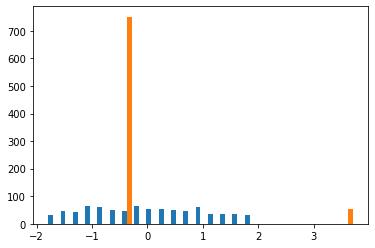

In [ ]:
pyplot.hist(data_trans_std_oxygen, bins=25)

#### We will do the same. with the other metric we consider - std_glucose.

In [ ]:
power_std_glucose = PowerTransformer(method='yeo-johnson', standardize=True) 
data_trans_std_glucose = power_std_glucose.fit_transform(df_train[["std_glucose", "class"]])
data_trans_std_glucose

array([[ 0.05736479,  3.72926365],
       [-0.3022349 , -0.26814945],
       [-0.68158678, -0.26814945],
       ...,
       [-0.48835947, -0.26814945],
       [-0.11826816, -0.26814945],
       [-1.25680924, -0.26814945]])

#### In this case the similar functions were used basing on lamdas.

In [ ]:
power_std_glucose.lambdas_

array([  4.00008657, -21.50673482])

#### And the histogram looks similar to std_oxygen too.

(array([[ 40.,  49.,  46.,  43.,  49.,  50.,  54.,  43.,  72.,  50.,  48.,
          55.,  50.,  54.,  60.,  42.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0., 751.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,  54.]]),
 array([-1.83039105, -1.60800486, -1.38561867, -1.16323248, -0.9408463 ,
        -0.71846011, -0.49607392, -0.27368773, -0.05130154,  0.17108464,
         0.39347083,  0.61585702,  0.83824321,  1.0606294 ,  1.28301559,
         1.50540177,  1.72778796,  1.95017415,  2.17256034,  2.39494653,
         2.61733271,  2.8397189 ,  3.06210509,  3.28449128,  3.50687747,
         3.72926365]),
 <a list of 2 Lists of Patches objects>)

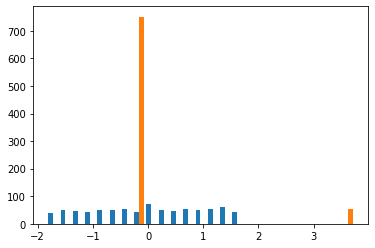

In [ ]:
pyplot.hist(data_trans_std_glucose, bins=25)

In [ ]:
power_std_glucose.inverse_transform(data_trans_std_glucose)

array([[45.26616637,  1.        ],
       [44.51713524,  0.        ],
       [43.68468059,  0.        ],
       ...,
       [44.11445781,  0.        ],
       [44.90490984,  0.        ],
       [42.32596418,  0.        ]])

In [ ]:
df_train["std_oxygen"]=data_trans_std_oxygen[:,0]
df_train["std_glucose"]=data_trans_std_glucose[:,0]
df_train["class"]=data_trans_std_glucose[:,1]
df_train

,name,age,sex,date_of_birth,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass,race,country,marriage,family_state,street_address,state,postcode,city
0,Roscoe Bohannon,59,Male,12/01/1960,9.997593,Farming-fishing,False,6.0,4.485091,69.210938,0.141454,0.0,47.985503,2.024291,180318.0,3.729264,0.057365,<=50K,2.546823,35.0,0.0,Local-gov,White,United-States,Never-married,Unmarried,7183 Osborne Ways Apt. 651,OH,53211,East Andrew
6,Boyd Eiselein,68,Male,16/10/1952,10.562915,Sales,False,10.0,0.201607,114.117188,-0.541633,0.0,47.985503,0.332225,187376.0,-0.268149,-0.302235,>50K,2.004181,60.0,0.0,Private,White,United-States,Married-civ-spouse,Husband,29941 Christopher Curve Apt. 682,VA,32742,Raychester
18,Daniel Crossman,54,Male,29/03/1966,6.639322,Sales,False,13.0,0.858498,100.772650,0.574813,0.0,50.349528,0.057607,108435.0,-0.268149,-0.681587,>50K,3.717391,50.0,0.0,Self-emp-inc,White,United-States,Married-civ-spouse,Husband,74669 Robles Drive,LA,63565,Port Madisonbury
20,George Hairston,54,Male,06/01/1966,10.757831,Sales,False,10.0,0.598783,97.843750,-1.798412,0.0,47.985503,0.499224,238474.0,-0.268149,-1.354444,<=50K,1.979933,25.0,0.0,Private,White,United-States,Never-married,Own-child,18356 Benjamin Roads,NJ,58120,South Nancy
21,Jeffrey Taylor,54,Female,18/06/1966,11.066126,Prof-specialty,False,14.0,0.693465,120.976562,-0.468989,0.0,47.985503,0.455733,526968.0,-0.268149,-0.551811,>50K,1.884615,38.0,0.0,Private,White,United-States,Never-married,Not-in-family,USNV Kim,AA,96043,FPO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,Charles Perryman,40,Male,17/05/1980,10.945818,Prof-specialty,False,9.0,0.865436,96.757812,-0.851112,0.0,47.985503,0.592870,389850.0,-0.268149,0.342512,<=50K,1.638796,50.0,0.0,Private,Black,United-States,Married-spouse-absent,Unmarried,136 Kane Points,VT,78663,New Larry
3923,Mark Goldberg,45,Male,01/10/1975,6.289634,Exec-managerial,False,10.0,-0.252255,100.772650,0.378271,0.0,47.735656,0.032944,247383.0,-0.268149,1.156783,>50K,3.772575,40.0,0.0,Self-emp-inc,White,United-States,Married-civ-spouse,Husband,2405 Hunter View Apt. 348,DC,63461,North Luishaven
3925,Edward Peschel,50,Male,19/10/1970,9.603359,Craft-repair,False,10.0,-0.067414,128.023438,-1.521120,0.0,47.985503,0.170496,160625.0,-0.268149,-0.488359,<=50K,2.332776,47.0,0.0,Private,White,United-States,Divorced,Not-in-family,6562 James Plaza Apt. 950,ND,07273,Ryanberg
3927,Emerson Williams,64,Female,28/05/1956,8.257806,Other-service,False,9.0,0.267982,110.546875,0.298078,0.0,47.985503,0.211692,299358.0,-0.268149,-0.118268,<=50K,3.099498,25.0,1719.0,Private,White,United-States,Widowed,Other-relative,888 Benjamin Parks Suite 847,IA,66533,Donaldtown


#### In order to get the data back, we will use inverse_transform() as it is shown below.

In [ ]:
power_std_oxygen.inverse_transform(df_train[["std_oxygen", "class"]])

array([[18.20122515,  1.        ],
       [15.98559602,  0.        ],
       [20.02929456,  0.        ],
       ...,
       [13.69860584,  0.        ],
       [18.81558007,  0.        ],
       [16.98030932,  0.        ]])

In [ ]:
power_std_glucose.inverse_transform(df_train[["std_glucose", "class"]])

array([[45.26616637,  1.        ],
       [44.51713524,  0.        ],
       [43.68468059,  0.        ],
       ...,
       [44.11445781,  0.        ],
       [44.90490984,  0.        ],
       [42.32596418,  0.        ]])

## Text data normalization

#### In this section we will transform only useful text data to vector, the other we will drop

In [ ]:
def getCorr(first, second):
  df=pd.DataFrame()
  df["first"]=first.astype('category').cat.codes
  df["second"]=second.astype('category').cat.codes

  print(df.corr())

In [ ]:
count_vect = CountVectorizer()

#### As we can see column class does not depend on column race, so we will drop it.

In [ ]:
getCorr(df_train.race, df_train["class"] )

           first    second
first   1.000000  0.025221
second  0.025221  1.000000


In [ ]:
df_train.drop('race', axis='columns', inplace=True)

#### The same we will do with other columns, where correlation is too small.

In [ ]:
getCorr(df_train.country, df_train["class"] )

           first    second
first   1.000000  0.040116
second  0.040116  1.000000


In [ ]:
X_train_counts = count_vect.fit_transform(df_train.country)
print(count_vect.get_feature_names())
print(X_train_counts.toarray())
df_train.country=X_train_counts.toarray().tolist()

['cambodia', 'canada', 'china', 'cuba', 'dominican', 'ecuador', 'el', 'england', 'germany', 'honduras', 'hong', 'india', 'italy', 'jamaica', 'laos', 'mexico', 'philippines', 'poland', 'puerto', 'republic', 'rico', 'salvador', 'scotland', 'south', 'states', 'taiwan', 'thailand', 'united']
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
getCorr(df_train.workclass, df_train["class"] )

           first    second
first   1.000000 -0.022848
second -0.022848  1.000000


In [ ]:
X_train_counts = count_vect.fit_transform(df_train.workclass)
print(count_vect.get_feature_names())
print(X_train_counts.toarray())
df_train.workclass=X_train_counts.toarray().tolist()

['emp', 'federal', 'gov', 'inc', 'local', 'not', 'pay', 'private', 'self', 'state', 'without']
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
getCorr(df_train.family_state, df_train["class"] )

           first    second
first   1.000000 -0.033776
second -0.033776  1.000000


In [ ]:
df_train.drop('family_state', axis='columns', inplace=True)

In [ ]:
getCorr(df_train.marriage, df_train["class"] )

           first    second
first   1.000000 -0.051759
second -0.051759  1.000000


In [ ]:
df_train.drop('marriage', axis='columns', inplace=True)

In [ ]:
getCorr(df_train.income, df_train["class"] )

        first  second
first   1.000   0.033
second  0.033   1.000


In [ ]:
df_train["income"].unique()
df_train.rename(columns = {'income': 'income>50K', 'sex': 'Male' }, inplace=True)

In [ ]:
df_train["income>50K"]=df_train["income>50K"].replace(" >50K", 1).replace(" <=50K", 0)

In [ ]:
getCorr(df_train.state, df_train["class"] )

           first    second
first   1.000000 -0.015692
second -0.015692  1.000000


In [ ]:
df_train.drop('state', axis='columns', inplace=True)

In [ ]:
getCorr(df_train.postcode, df_train["class"] )

           first    second
first   1.000000  0.000704
second  0.000704  1.000000


In [ ]:
df_train.drop('postcode', axis='columns', inplace=True)

In [ ]:
getCorr(df_train.city, df_train["class"] )

           first    second
first   1.000000 -0.055963
second -0.055963  1.000000


In [ ]:
df_train.drop('city', axis='columns', inplace=True)

In [ ]:
getCorr(df_train.street_address, df_train["class"] )

           first    second
first   1.000000  0.047155
second  0.047155  1.000000


In [ ]:
df_train.drop('street_address', axis='columns', inplace=True)

In [ ]:
getCorr(df_train.occupation, df_train["class"] )

           first    second
first   1.000000 -0.043381
second -0.043381  1.000000


In [ ]:
X_train_counts = count_vect.fit_transform(df_train.occupation)
print(count_vect.get_feature_names())
print(X_train_counts.toarray())
df_train.occupation=X_train_counts.toarray().tolist()

['adm', 'adm_clerical', 'armed', 'cleaners', 'clerical', 'craft', 'craft_repair', 'exec', 'exec_managerial', 'farming', 'farming_fishing', 'fishing', 'forces', 'handlers', 'handlers_cleaners', 'house', 'inspct', 'machine', 'machine_op_inspct', 'managerial', 'moving', 'op', 'other', 'other_service', 'priv', 'prof', 'prof_specialty', 'protective', 'protective_serv', 'repair', 'sales', 'serv', 'service', 'specialty', 'support', 'tech', 'tech_support', 'transport', 'transport_moving']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
getCorr(df_train.pregnant, df_train["class"] )

           first    second
first   1.000000 -0.023237
second -0.023237  1.000000


In [ ]:
df_train.drop('pregnant', axis='columns', inplace=True)

In [ ]:
getCorr(df_train.Male, df_train["class"] )

           first    second
first   1.000000  0.030415
second  0.030415  1.000000


In [ ]:
df_train.Male=df_train.Male.replace("Male", 1).replace("Female", 0)

In [ ]:
getCorr(df_train.name, df_train["class"] )

           first    second
first   1.000000 -0.012907
second -0.012907  1.000000


In [ ]:
df_train.drop('name', axis='columns', inplace=True)

#### We can drop column date_of_birth due to the fact that we have column age

In [ ]:
df_train.drop('date_of_birth', axis='columns', inplace=True)

#### At the end of the day, we decided to leave some basic information as sex, occupation, income, workclass and country.

In [ ]:
df_train

,age,Male,kurtosis_oxygen,occupation,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,income>50K,mean_oxygen,hours-per-week,capital-loss,workclass,country
0,59,1,9.997593,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...",6.0,4.485091,69.210938,0.141454,0.0,47.985503,2.024291,180318.0,3.729264,0.057365,0,2.546823,35.0,0.0,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,68,1,10.562915,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.0,0.201607,114.117188,-0.541633,0.0,47.985503,0.332225,187376.0,-0.268149,-0.302235,1,2.004181,60.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18,54,1,6.639322,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.0,0.858498,100.772650,0.574813,0.0,50.349528,0.057607,108435.0,-0.268149,-0.681587,1,3.717391,50.0,0.0,"[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
20,54,1,10.757831,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.0,0.598783,97.843750,-1.798412,0.0,47.985503,0.499224,238474.0,-0.268149,-1.354444,0,1.979933,25.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
21,54,0,11.066126,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",14.0,0.693465,120.976562,-0.468989,0.0,47.985503,0.455733,526968.0,-0.268149,-0.551811,1,1.884615,38.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,40,1,10.945818,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.0,0.865436,96.757812,-0.851112,0.0,47.985503,0.592870,389850.0,-0.268149,0.342512,0,1.638796,50.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3923,45,1,6.289634,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",10.0,-0.252255,100.772650,0.378271,0.0,47.735656,0.032944,247383.0,-0.268149,1.156783,1,3.772575,40.0,0.0,"[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3925,50,1,9.603359,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.0,-0.067414,128.023438,-1.521120,0.0,47.985503,0.170496,160625.0,-0.268149,-0.488359,0,2.332776,47.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3927,64,0,8.257806,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.0,0.267982,110.546875,0.298078,0.0,47.985503,0.211692,299358.0,-0.268149,-0.118268,0,3.099498,25.0,1719.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Pipeline

#### Duplicates

In [ ]:
def remove_duplicates(df_t):
  filledgroups_f = df_t.groupby(["name", "address"]).apply(lambda x: x.ffill().bfill())
  df_t = filledgroups_f
  df_t.drop_duplicates(inplace=True)
  df_t = df_t.reset_index(drop=True)
  return df_t

#### Date format

In [ ]:
def future_date(x):
  if (pd.to_datetime(x) > pd.to_datetime('01/01/2018')):
    return (pd.to_datetime(x)-pd.DateOffset(years=100)).strftime('%d/%m/%Y')
  else:
    return x

def dateformat_consistent(df_t):
  df_t.date_of_birth = df_t.date_of_birth.apply(lambda x: pd.to_datetime(x[:10], yearfirst=True).strftime('%d/%m/%Y'))
  df_t.date_of_birth=df_t.date_of_birth.apply(future_date)
  return df_t

#### Age

In [ ]:
def age_to_normal(df_t):
  now = pd.to_datetime('now')
  df_t.age =(now - pd.to_datetime(df_t.date_of_birth)).astype('<m8[Y]').astype("int64")
  return df_t

#### Gender

In [ ]:
def gender_to_normal(df_t):
  df_t.sex = df_t.sex.apply(lambda x: x[1:])
  return df_t

#### Pregnancy

In [ ]:
def pregnant_to_normal(df_t):
  df_t.pregnant = df_t.pregnant.replace(['F', 'FALSE', 'f'], False)
  df_t.pregnant = df_t.pregnant.replace(['T', 'TRUE', 't'], True)
  df_t.loc[df_t["sex"]=='Male', "pregnant"] = False
  return df_t

#### Metrics

In [ ]:
def str_to_float(x):
  try:
    return float(x)
  except ValueError:
    return np.nan

def metrics(df_t):
  df_t.mean_glucose =df_t.mean_glucose.apply(str_to_float)
  imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
  x_t = imp_mean.fit_transform(df_t[["mean_glucose", "class"]])
  df_t["mean_glucose"]=x_t[:,0]

  imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
  x_t = imp_mean.fit_transform(df_t[["kurtosis_glucose", "class"]])
  df_t["kurtosis_glucose"]=x_t[:,0]

  imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
  x_t = imp_median.fit_transform(df_t[["std_oxygen", "class"]])
  df_t["std_oxygen"]=x_t[:,0]

  imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
  x_t = imp_median.fit_transform(df_t[["kurtosis_oxygen", "class"]])
  df_t["kurtosis_oxygen"]=x_t[:,0]

  KNN_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
  X_t =KNN_imputer.fit_transform(df_t[['mean_oxygen', 'class']])
  df_t.mean_oxygen=X_t[:,0]

  KNN_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
  X_t =KNN_imputer.fit_transform(df_t[['std_glucose', 'class']])
  df_t.std_glucose=X_t[:,0]

  imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  x_t = imp_most_frequent.fit_transform(df_t[["skewness_oxygen", "class"]])
  df_t["skewness_oxygen"]=x_t[:,0]

  imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  x_t = imp_most_frequent.fit_transform(df_t[["skewness_glucose", "class"]])
  df_t["skewness_glucose"]=x_t[:,0]

  X_t =KNN_imputer.fit_transform(df_t[['class', "std_glucose"]])
  df_t["class"]=X_t[:,0]
  return df_t

#### Occupation

In [ ]:
def float_to_str(x):
  try:
    return str(x)
  except ValueError:
    return "  "
    
def occupation_to_normal(df_t):
  occupation =df_t.occupation.apply(float_to_str).replace('nan', " nan").apply(lambda x: x[1:])
  occupation =occupation.replace('?', np.nan).replace('nan', np.nan).replace('', np.nan)
  df_t.occupation=occupation

  imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  x_t = imp_most_frequent.fit_transform(df_t[["occupation", "class"]])
  df_t["occupation"]=x_t[:,0]
  return df_t

#### Personal info

In [ ]:
def personal_info_to_normal(df_t):
  personal_info=df_t["personal_info"].apply(float_to_str)
  personal_info= personal_info.replace("nan", "nan|nan\r\r\nnan -- nan|nan")
  df_splited=personal_info.apply(float_to_str).str.split("|", n=1)
  
  df_t["race"]=df_splited.apply(lambda x: x[0]).replace("nan", np.nan)
  
  df_splited2=df_splited.apply(lambda x:x[1])
  
  df_t["country"]=df_splited2.str.split("\r", n=1).apply(lambda x:x[0]).replace("nan", np.nan).replace("?", np.nan)
  df_splited3=df_splited2.str.split("\n", n=1).apply(lambda x:x[1]).str.split(" -- ", n=1).apply(lambda x:x[1]).str.split("|", n=1)
  
  df_t["marriage"]=df_splited3.apply(lambda x: x[0]).replace("nan", np.nan)
  
  df_t["family_state"]=df_splited3.apply(lambda x: x[1]).replace("nan", np.nan)
  
  df_t.drop('personal_info', axis='columns', inplace=True)
  
  imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  x_t = imp_most_frequent.fit_transform(df_t[["race", "class"]])
  df_t["race"]=x_t[:,0]

  x_t = imp_most_frequent.fit_transform(df_t[["country", "class"]])
  df_t["country"]=x_t[:,0]

  x_t = imp_most_frequent.fit_transform(df_t[["marriage", "class"]])
  df_t["marriage"]=x_t[:,0]

  x_t = imp_most_frequent.fit_transform(df_t[["family_state", "class"]])
  df_t["family_state"]=x_t[:,0]

  return df_t
  

#### Address

In [ ]:
def get_state(x):
  x=x.split(", ")
  if(len(x)>1):
    return x[1].split(" ")[0]
  return x[0].split(" ")[1]

def get_postcode(x):
  x=x.split(", ")
  if(len(x)>1):
    return x[1].split(" ")[1]
  return x[0].split(" ")[2]

def hasNumbers(inputString):
  return any(char.isdigit() for char in inputString)

def get_city(x):
  if( hasNumbers(x) ):
    return x.split(" ")[0]
  else: 
    return x
    
def address_to_normal(df_t):
  address=df_t.address
  address=address.replace('nan', 'nan\r\nnan, nan nan')
  df_t.address=address

  df_t["street_address"]=df_t.address.str.split("\r").apply(lambda x: x[0])

  df_t["state"]=df_t.address.str.split("\n").apply(lambda x: x[1]).apply(get_state)
  
  df_t["postcode"]=df_t.address.str.split("\n").apply(lambda x: x[1]).apply(get_postcode)

  df_t["city"]=df_t.address.str.split("\n").apply(lambda x: x[1]).str.split(",").apply(lambda x: x[0]).apply(get_city)

  df_t.drop('address',
  axis='columns', inplace=True)

  imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  
  x_t = imp_most_frequent.fit_transform(df_t[["state", "class"]])
  df_t["state"]=x_t[:,0]

  x_t = imp_most_frequent.fit_transform(df_t[["street_address", "class"]])
  df_t["street_address"]=x_t[:,0]

  x_t = imp_most_frequent.fit_transform(df_t[["postcode", "class"]])
  df_t["postcode"]=x_t[:,0]

  x_t = imp_most_frequent.fit_transform(df_t[["city", "class"]])
  df_t["city"]=x_t[:,0]

  return df_t



#### Other information

In [ ]:
def others_to_normal(df_t):

  imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

  x_t = imp_most_frequent.fit_transform(df_t[["fnlwgt", "class"]])
  df_t["fnlwgt"]=x_t[:,0]

  df_t["workclass"]=df_t.workclass.apply(lambda x: x[1:]).replace("?", np.nan)
  x_t = imp_most_frequent.fit_transform(df_t[["workclass", "class"]])
  df_t["workclass"]=x_t[:,0]

  x_t = imp_most_frequent.fit_transform(df_t[["income", "class"]])
  df_t["income"]=x_t[:,0]
  return df_t

#### Outliers

In [ ]:
def identify_outliers(a, k, q):
    med=a.quantile(0.75)-a.quantile(0.25)
    lower = df_train.std_oxygen.quantile(q)-k*med
    upper=df_train.std_oxygen.quantile(1-q)+k*med
    return a[(a > upper) | (a < lower)]

def identify_outliers_upper(a, k, q):
    med=a.quantile(0.75)-a.quantile(0.25)
    lower = df_train.std_oxygen.quantile(q)-k*med
    upper=df_train.std_oxygen.quantile(1-q)+k*med
    return a[a > upper]

def identify_outliers_lower(a, k, q):
    med=a.quantile(0.75)-a.quantile(0.25)
    lower = df_train.std_oxygen.quantile(q)-k*med
    upper=df_train.std_oxygen.quantile(1-q)+k*med
    return a[a < lower]

def change_outliers(df_t):
  df_normal_std_oxygen_1= df_t["std_oxygen"]
  df_normal_std_oxygen_out =identify_outliers(df_normal_std_oxygen_1, 0.1, 0.25)
  df_t = df_t.drop(df_normal_std_oxygen_out.index)
  df_t = df_t.reset_index(drop=True)

  df_normal_std_glucose_1= df_t["std_glucose"]
  df_normal_std_glucose_out =identify_outliers(df_normal_std_glucose_1,-2.5, 0.05)
  df_t = df_t.drop(df_normal_std_glucose_out.index)
  df_t = df_t.reset_index(drop=True)

  df_normal_skewness_oxygen_1= df_t["skewness_oxygen"]
  df_normal_skewness_oxygen_out_1 =identify_outliers_lower(df_normal_skewness_oxygen_1,  0.1, 0.25)
  
  df_normal_skewness_oxygen_2= df_t["skewness_oxygen"]
  df_normal_skewness_oxygen_out_2 =identify_outliers_upper(df_normal_skewness_oxygen_2, 0.1, 0.25)

  df_t.loc[df_normal_skewness_oxygen_out_1.index,'skewness_oxygen'] = df_t.skewness_oxygen.quantile(0.05)
  df_t.loc[df_normal_skewness_oxygen_out_2.index,'skewness_oxygen'] = df_t.skewness_oxygen.quantile(0.95)
  
  return df_t

#### Power Transformer

In [ ]:
def power_t(df_t):
  power_std_oxygen = PowerTransformer(method='yeo-johnson', standardize=True) 
  data_trans_std_oxygen = power_std_oxygen.fit_transform(df_t[["std_oxygen", "class"]])

  power_std_glucose = PowerTransformer(method='yeo-johnson', standardize=True) 
  data_trans_std_glucose = power_std_glucose.fit_transform(df_t[["std_glucose", "class"]])

  df_t["std_oxygen"]=data_trans_std_oxygen[:,0]
  df_t["std_glucose"]=data_trans_std_glucose[:,0]
  # df_t["class"]=data_trans_std_glucose[:,1]
  return df_t;

#### Text data normalization

In [ ]:
def text_normalize(df_t):
  count_vect = CountVectorizer()

  df_t.drop('race', axis='columns', inplace=True)

  X_train_counts = count_vect.fit_transform(df_t.country)
  df_t.country=X_train_counts.toarray().tolist()

  X_train_counts = count_vect.fit_transform(df_t.workclass)
  df_t.workclass=X_train_counts.toarray().tolist()

  df_t.drop('family_state', axis='columns', inplace=True)
  df_t.drop('marriage', axis='columns', inplace=True)

  df_t.rename(columns = {'income': 'income>50K', 'sex': 'Male' }, inplace=True)
  df_t["income>50K"]=df_t["income>50K"].replace(" >50K", 1).replace(" <=50K", 0)

  df_t.drop('state', axis='columns', inplace=True)
  df_t.drop('postcode', axis='columns', inplace=True)
  df_t.drop('city', axis='columns', inplace=True)
  df_t.drop('street_address', axis='columns', inplace=True)

  X_train_counts = count_vect.fit_transform(df_t.occupation)
  df_t.occupation=X_train_counts.toarray().tolist()

  df_t.Male=df_t.Male.replace("Male", 1).replace("Female", 0)

  df_t.drop('pregnant', axis='columns', inplace=True)
  df_t.drop('name', axis='columns', inplace=True)
  df_t.drop('date_of_birth', axis='columns', inplace=True)
  return df_t


#### Pipeline

In [ ]:
def load_data():
  df_train_personal = pd.read_csv("personal_train.csv")
  df_train_other = pd.read_csv("other_train.csv")
  df_train_personal.drop(['Unnamed: 0'], axis='columns', inplace=True)
  df_train_other.drop(['Unnamed: 0'], axis='columns', inplace=True)
  df_train =pd.merge(df_train_personal, df_train_other, on=["name", "address"])
  return df_train

In [ ]:
trans_duplicates = FunctionTransformer(remove_duplicates)
trans_date = FunctionTransformer(dateformat_consistent)
trans_age = FunctionTransformer(age_to_normal)
trans_gender = FunctionTransformer(gender_to_normal)
trans_pregnant = FunctionTransformer(pregnant_to_normal)
trans_metrics = FunctionTransformer(metrics)
trans_occupation = FunctionTransformer(occupation_to_normal)
trans_personal_info = FunctionTransformer(personal_info_to_normal)
trans_address = FunctionTransformer(address_to_normal)
trans_others = FunctionTransformer(others_to_normal)
trans_outliers = FunctionTransformer(change_outliers)
trans_power = FunctionTransformer(power_t)
trans_text = FunctionTransformer(text_normalize)

sk_pipe = Pipeline([("duplicates", trans_duplicates), 
                    ("date", trans_date),
                    ("age", trans_age),
                    ("gender", trans_gender),
                    ("pregnancy", trans_pregnant),
                    ("metrics", trans_metrics),
                    ("occupation", trans_occupation),
                    ("personal_info", trans_personal_info),
                    ("address", trans_address),
                    ("others", trans_others),
                    ("outliers", trans_outliers),
                    ("power", trans_power),
                    ("text", trans_text)])
df_train = load_data()
df_train_normilize = sk_pipe.fit_transform(df_train)
df_train_normilize

,age,Male,kurtosis_oxygen,occupation,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,income>50K,mean_oxygen,hours-per-week,capital-loss,workclass,country
0,59,1,9.997593,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...",6.0,4.485091,69.210938,-0.035256,0.0,188.259894,2.024291,180318.0,1.0,-0.187099,0,2.546823,35.0,0.0,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,52,0,15.740712,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.0,2.462325,83.062500,-1.279903,0.0,188.259894,0.538981,197552.0,0.0,-1.758908,0,0.964047,35.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,49,1,8.702818,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0,-0.020573,131.039062,-0.476049,0.0,188.259894,-0.297637,191342.0,0.0,0.562064,0,2.441472,40.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,68,1,10.562915,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.0,0.201607,114.117188,-0.543970,0.0,188.259894,0.332225,187376.0,0.0,-0.344130,1,2.004181,60.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,50,1,4.472869,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",14.0,6.693900,64.507812,1.726260,0.0,20.467108,2.401340,180957.0,1.0,-0.180827,0,9.321906,50.0,0.0,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,45,1,6.289634,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",10.0,-0.252255,100.772650,0.144001,0.0,47.735656,0.032944,247383.0,0.0,0.270201,1,3.772575,40.0,0.0,"[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2030,50,1,9.603359,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.0,-0.067414,128.023438,-1.255299,0.0,188.259894,0.170496,160625.0,0.0,-0.427053,0,2.332776,47.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2031,64,0,8.257806,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.0,0.267982,110.546875,0.083117,0.0,188.259894,0.211692,299358.0,0.0,-0.263288,0,3.099498,25.0,1719.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2032,49,1,9.299312,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.0,1.322426,105.929688,-0.297968,0.0,188.259894,0.633040,155150.0,0.0,-0.782834,0,2.343645,40.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Export dataset to .csv

In [ ]:
joblib.dump(sk_pipe, 'pipeline.joblib')
df_train_normilize.to_csv('train.csv')

# Data Analysis


In [ ]:
df_train = load_data()

In [ ]:
df_train_normilize = sk_pipe.transform(df_train)

#### Now the metrics we will process are transformed to a normal distribution. The first one is std_oxygen. Changes of the std_oxygen distribution after processing are shown below.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


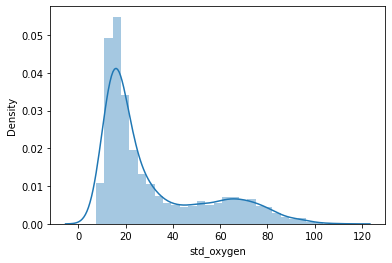

In [ ]:
# This plot shows how the data looked before
sns.distplot(df_train.std_oxygen)

#### The following plots show the final data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


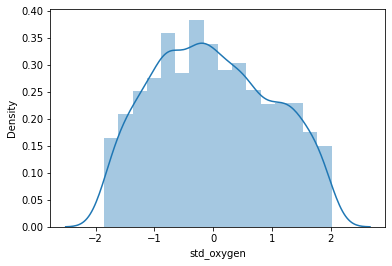

In [ ]:
sns.distplot(df_train_normilize.std_oxygen)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


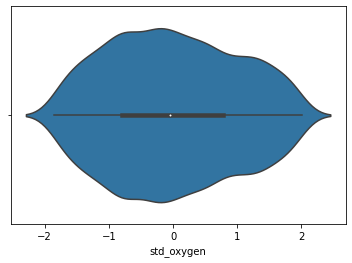

In [ ]:
ax = sns.violinplot('std_oxygen', data=df_train_normilize)

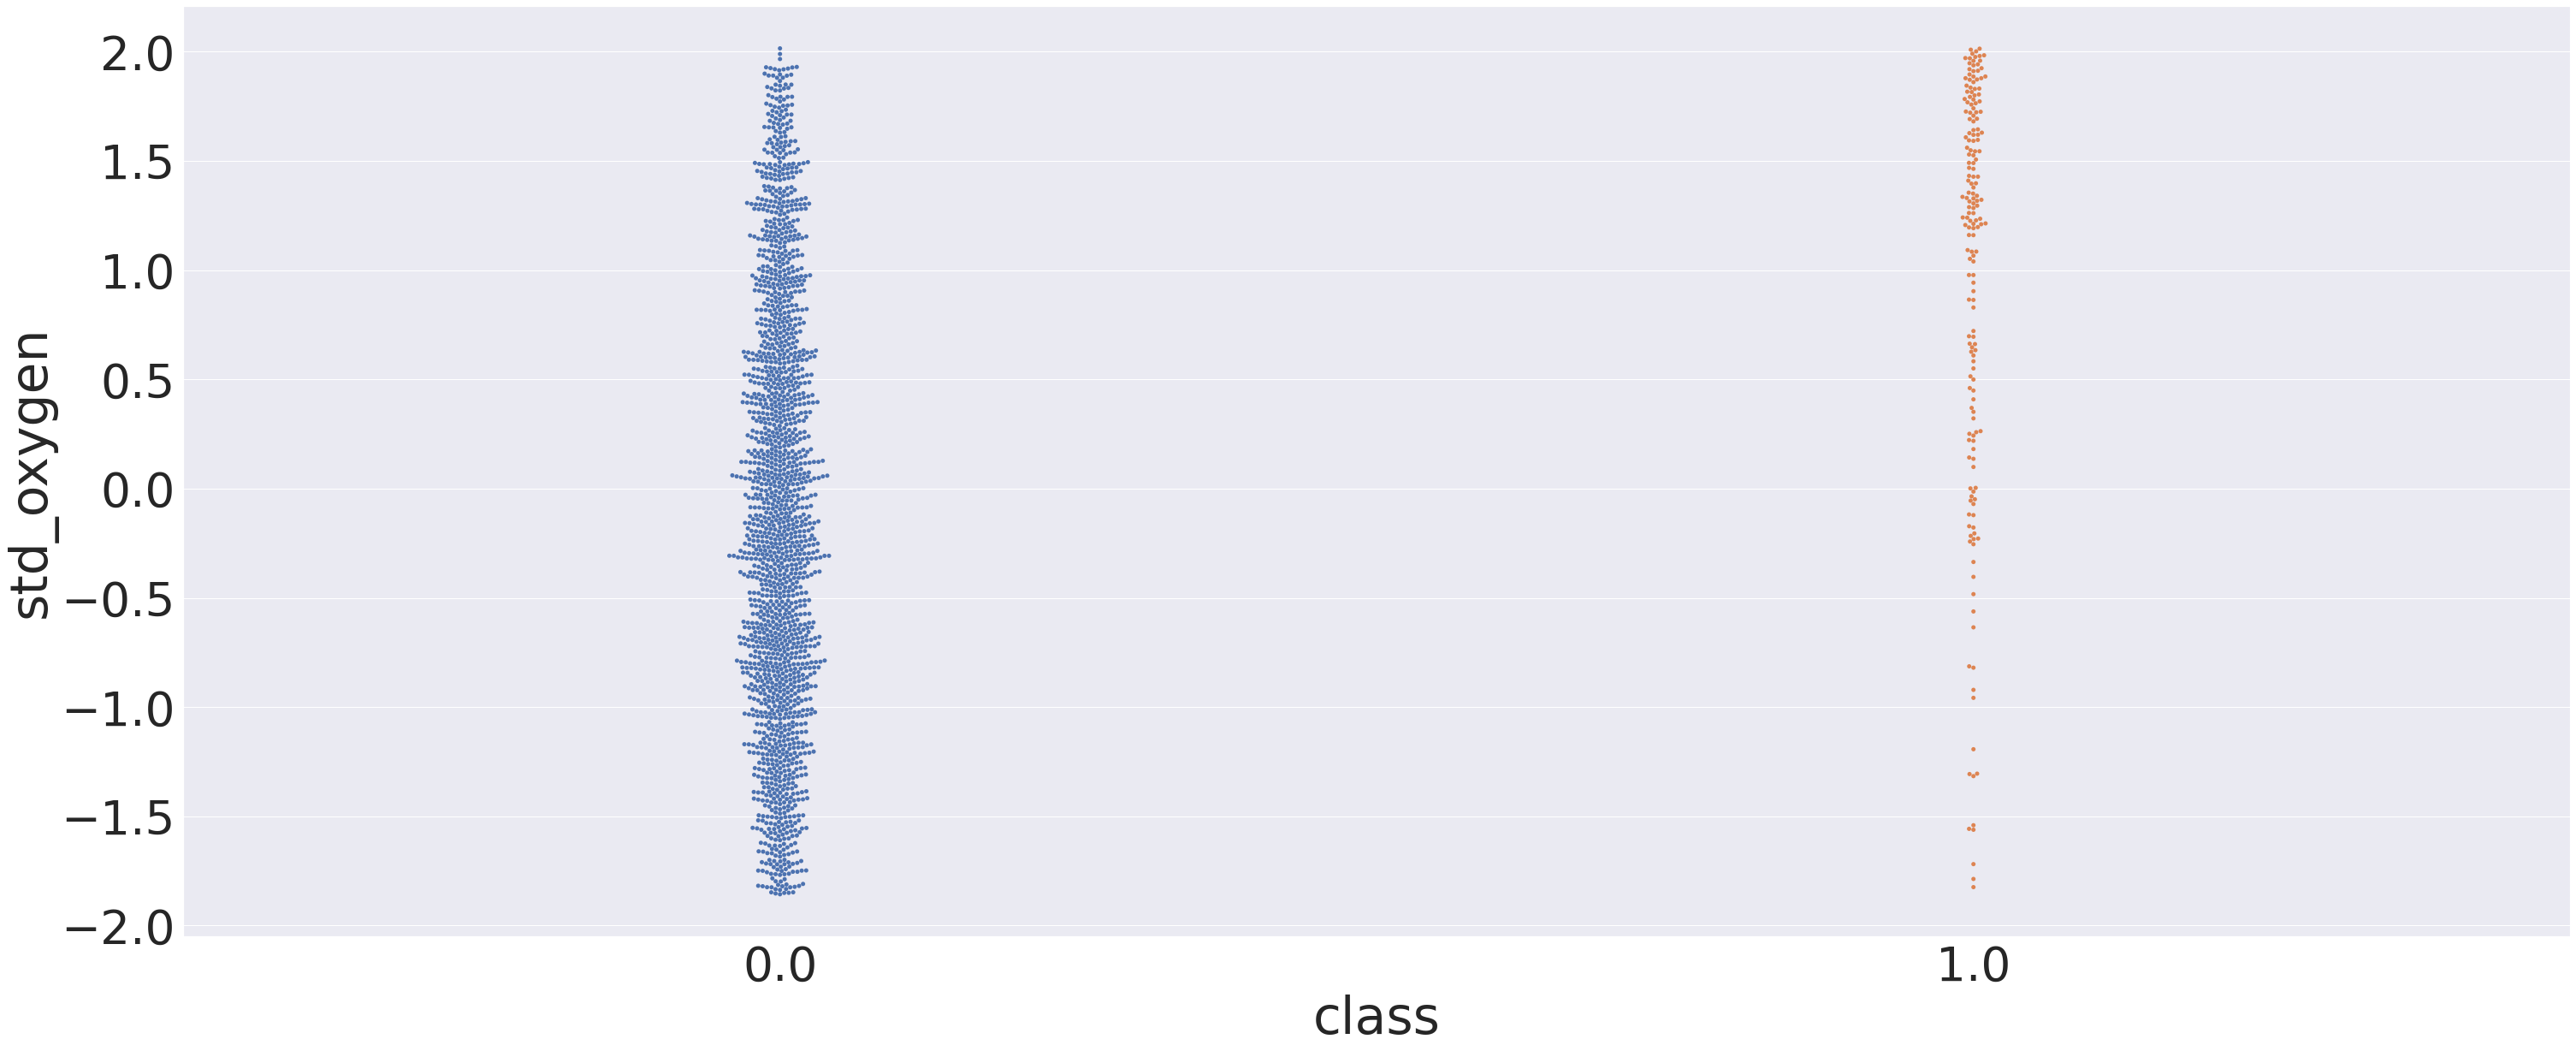

In [ ]:
plt.rcParams["figure.figsize"] = (50,20)
sns.set(font_scale=5) 
swarm = sns.swarmplot(x="class", y="std_oxygen", data=df_train_normilize)

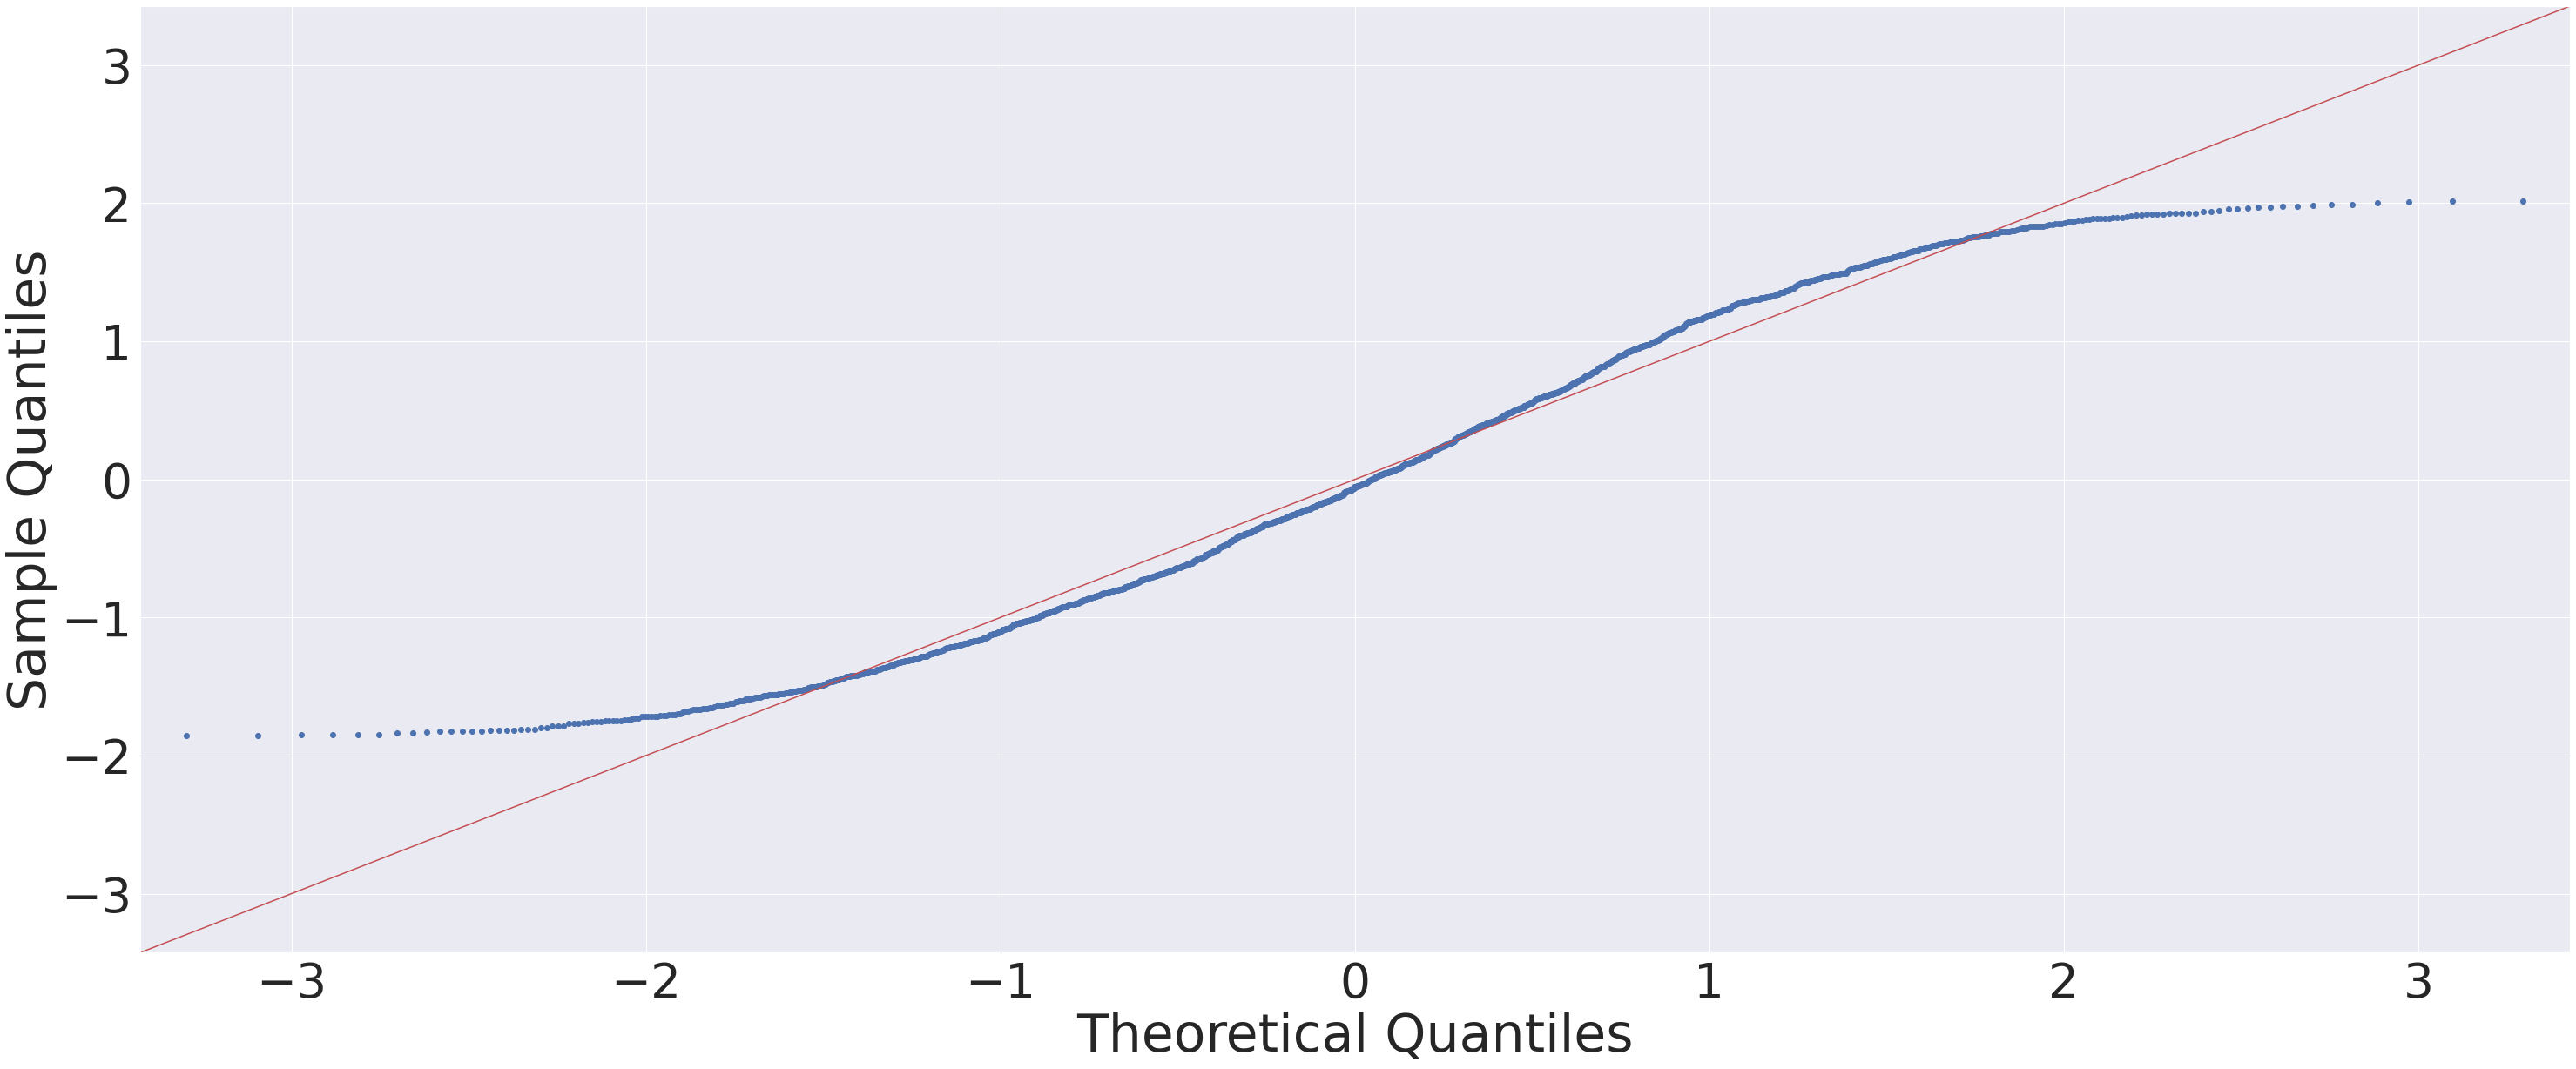

In [ ]:
_ = sm.ProbPlot(df_train_normilize.std_oxygen, fit=True).qqplot(line='45')

#### Changes of the std_glucose distribution after processing are shown below.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


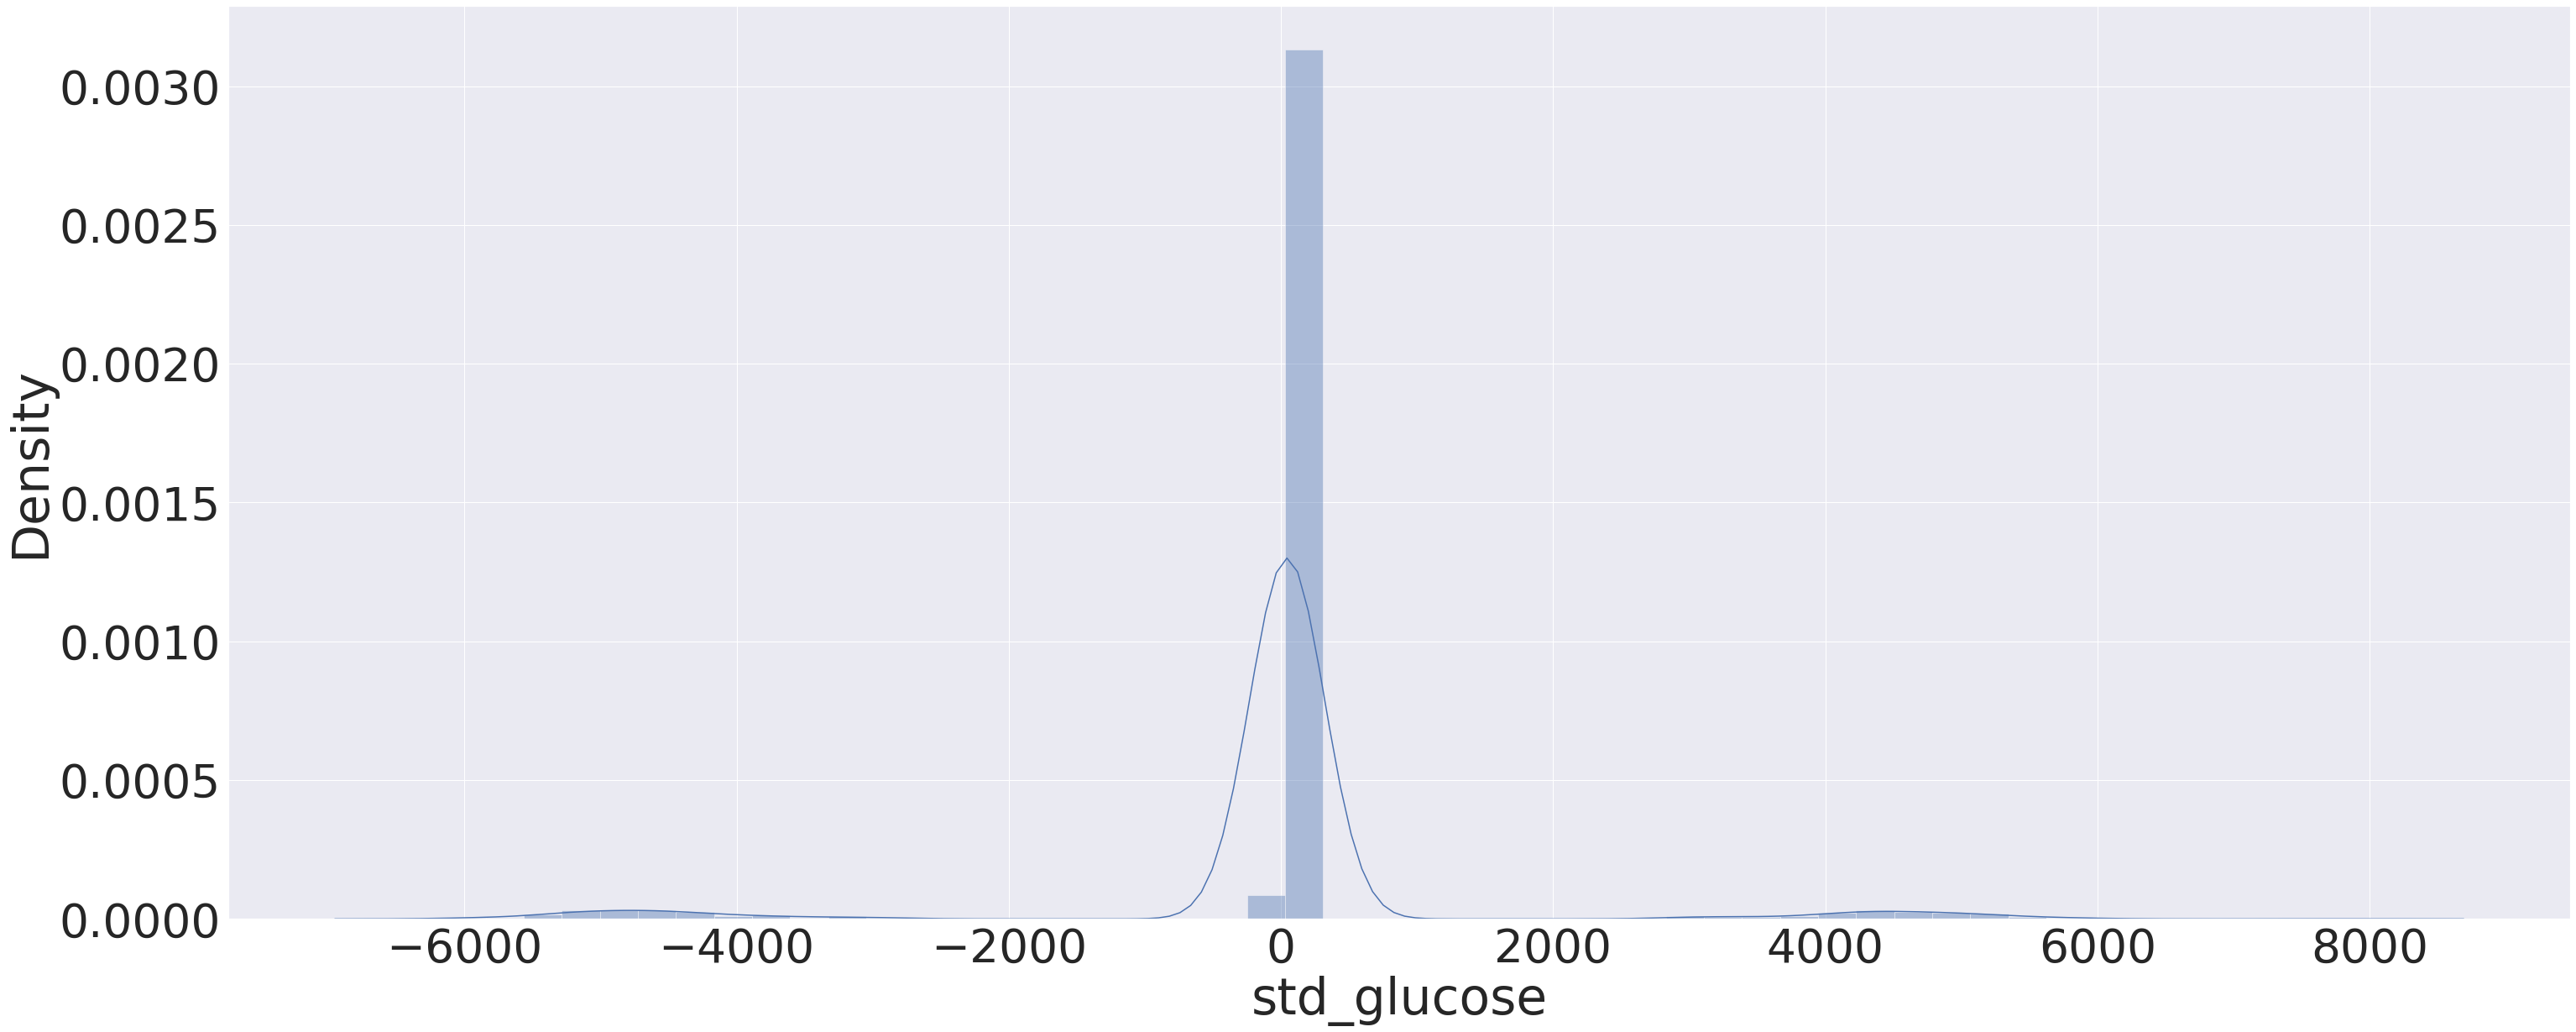

In [ ]:
#This plot shows the std_glucose distribution before processing
sns.distplot(df_train.std_glucose)

#### The following plots descibe final data distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


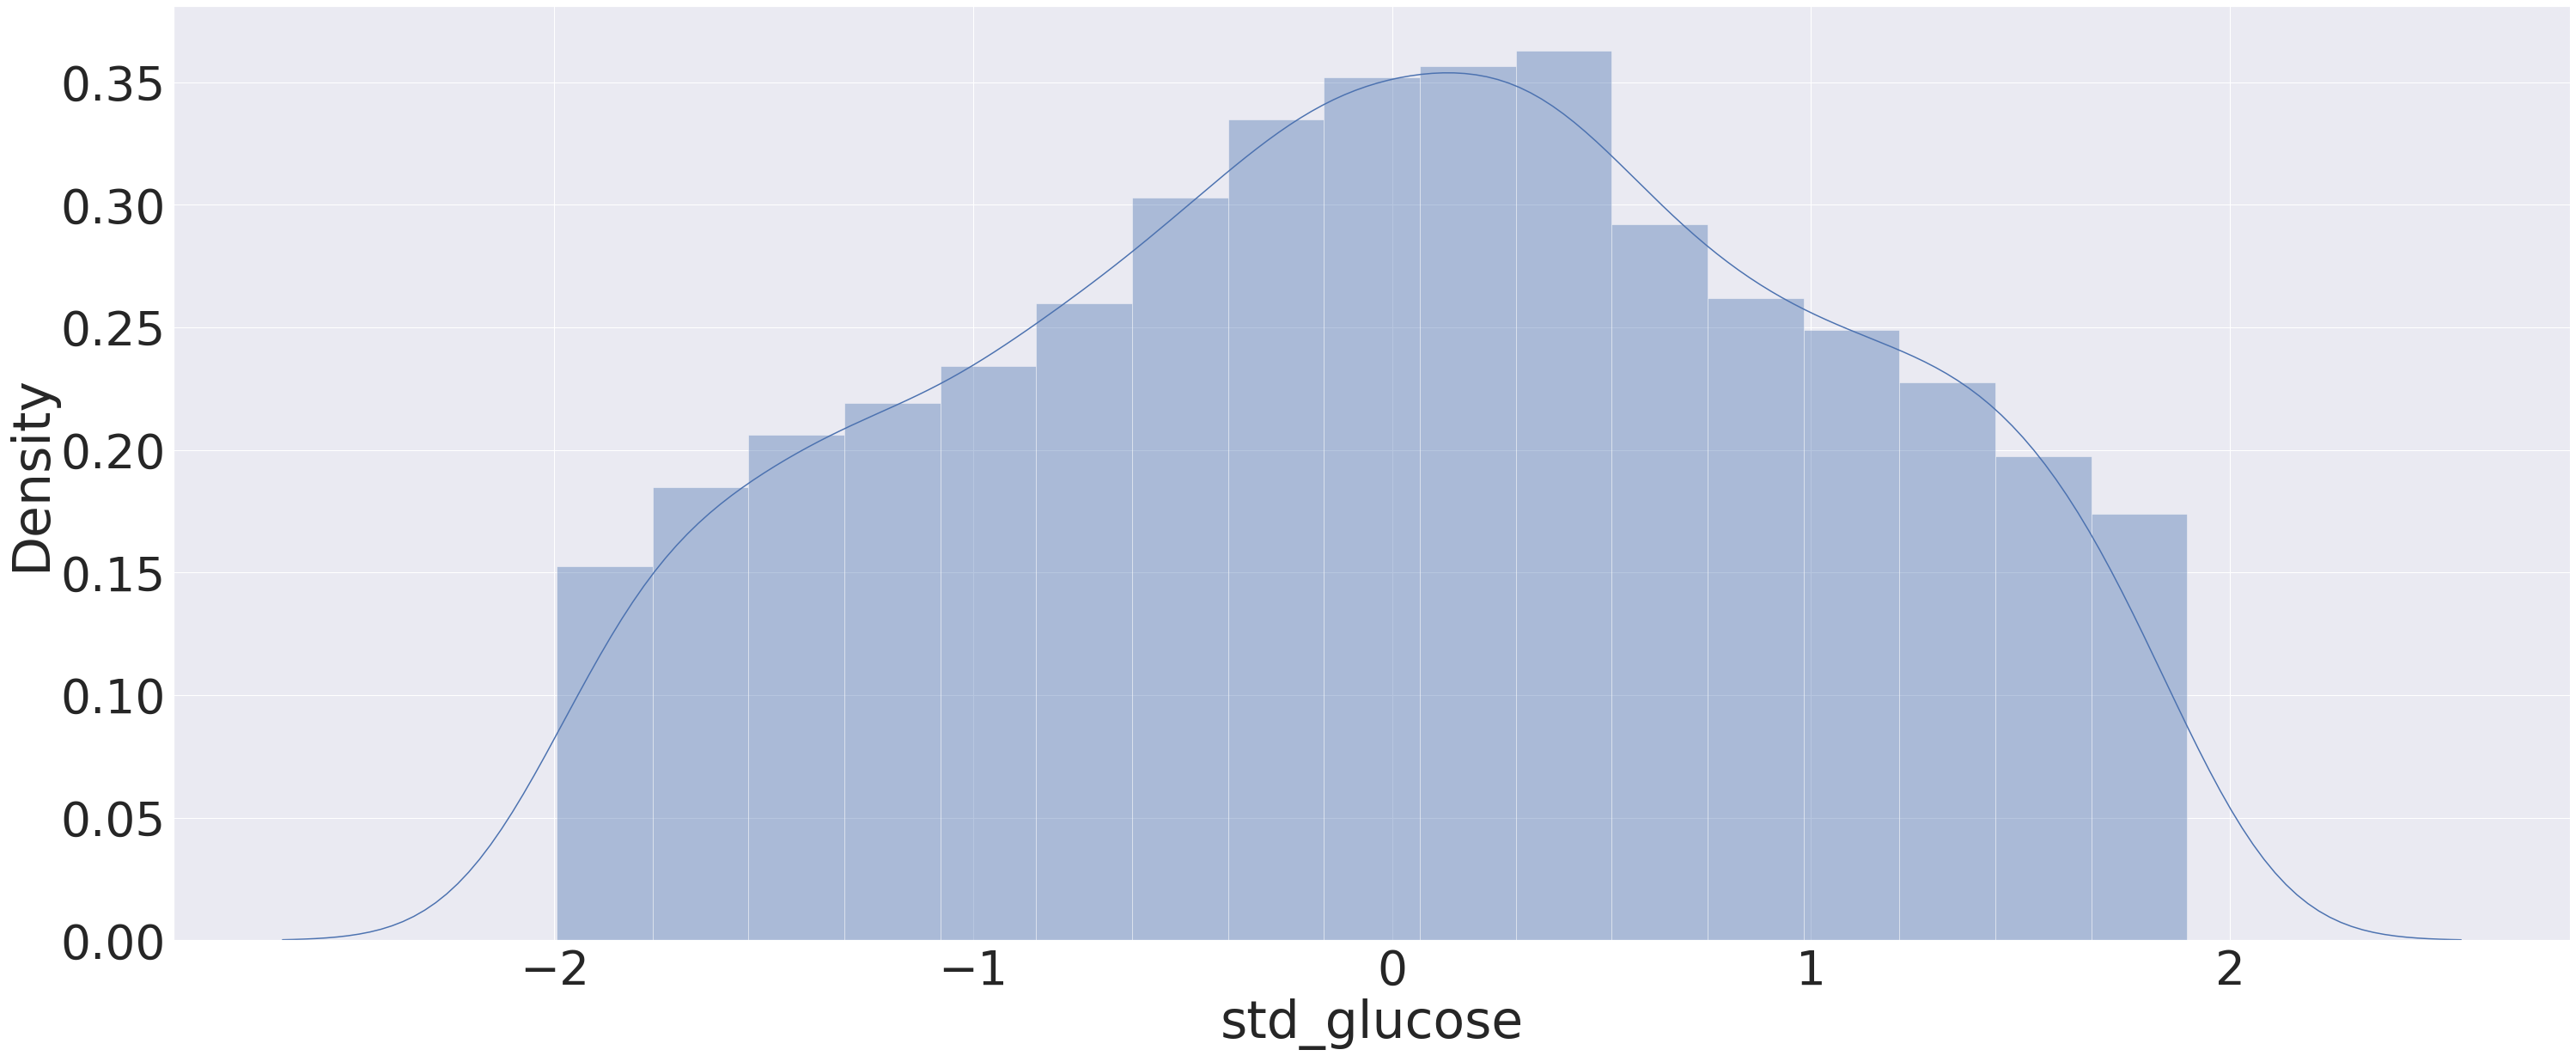

In [ ]:
sns.distplot(df_train_normilize.std_glucose)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


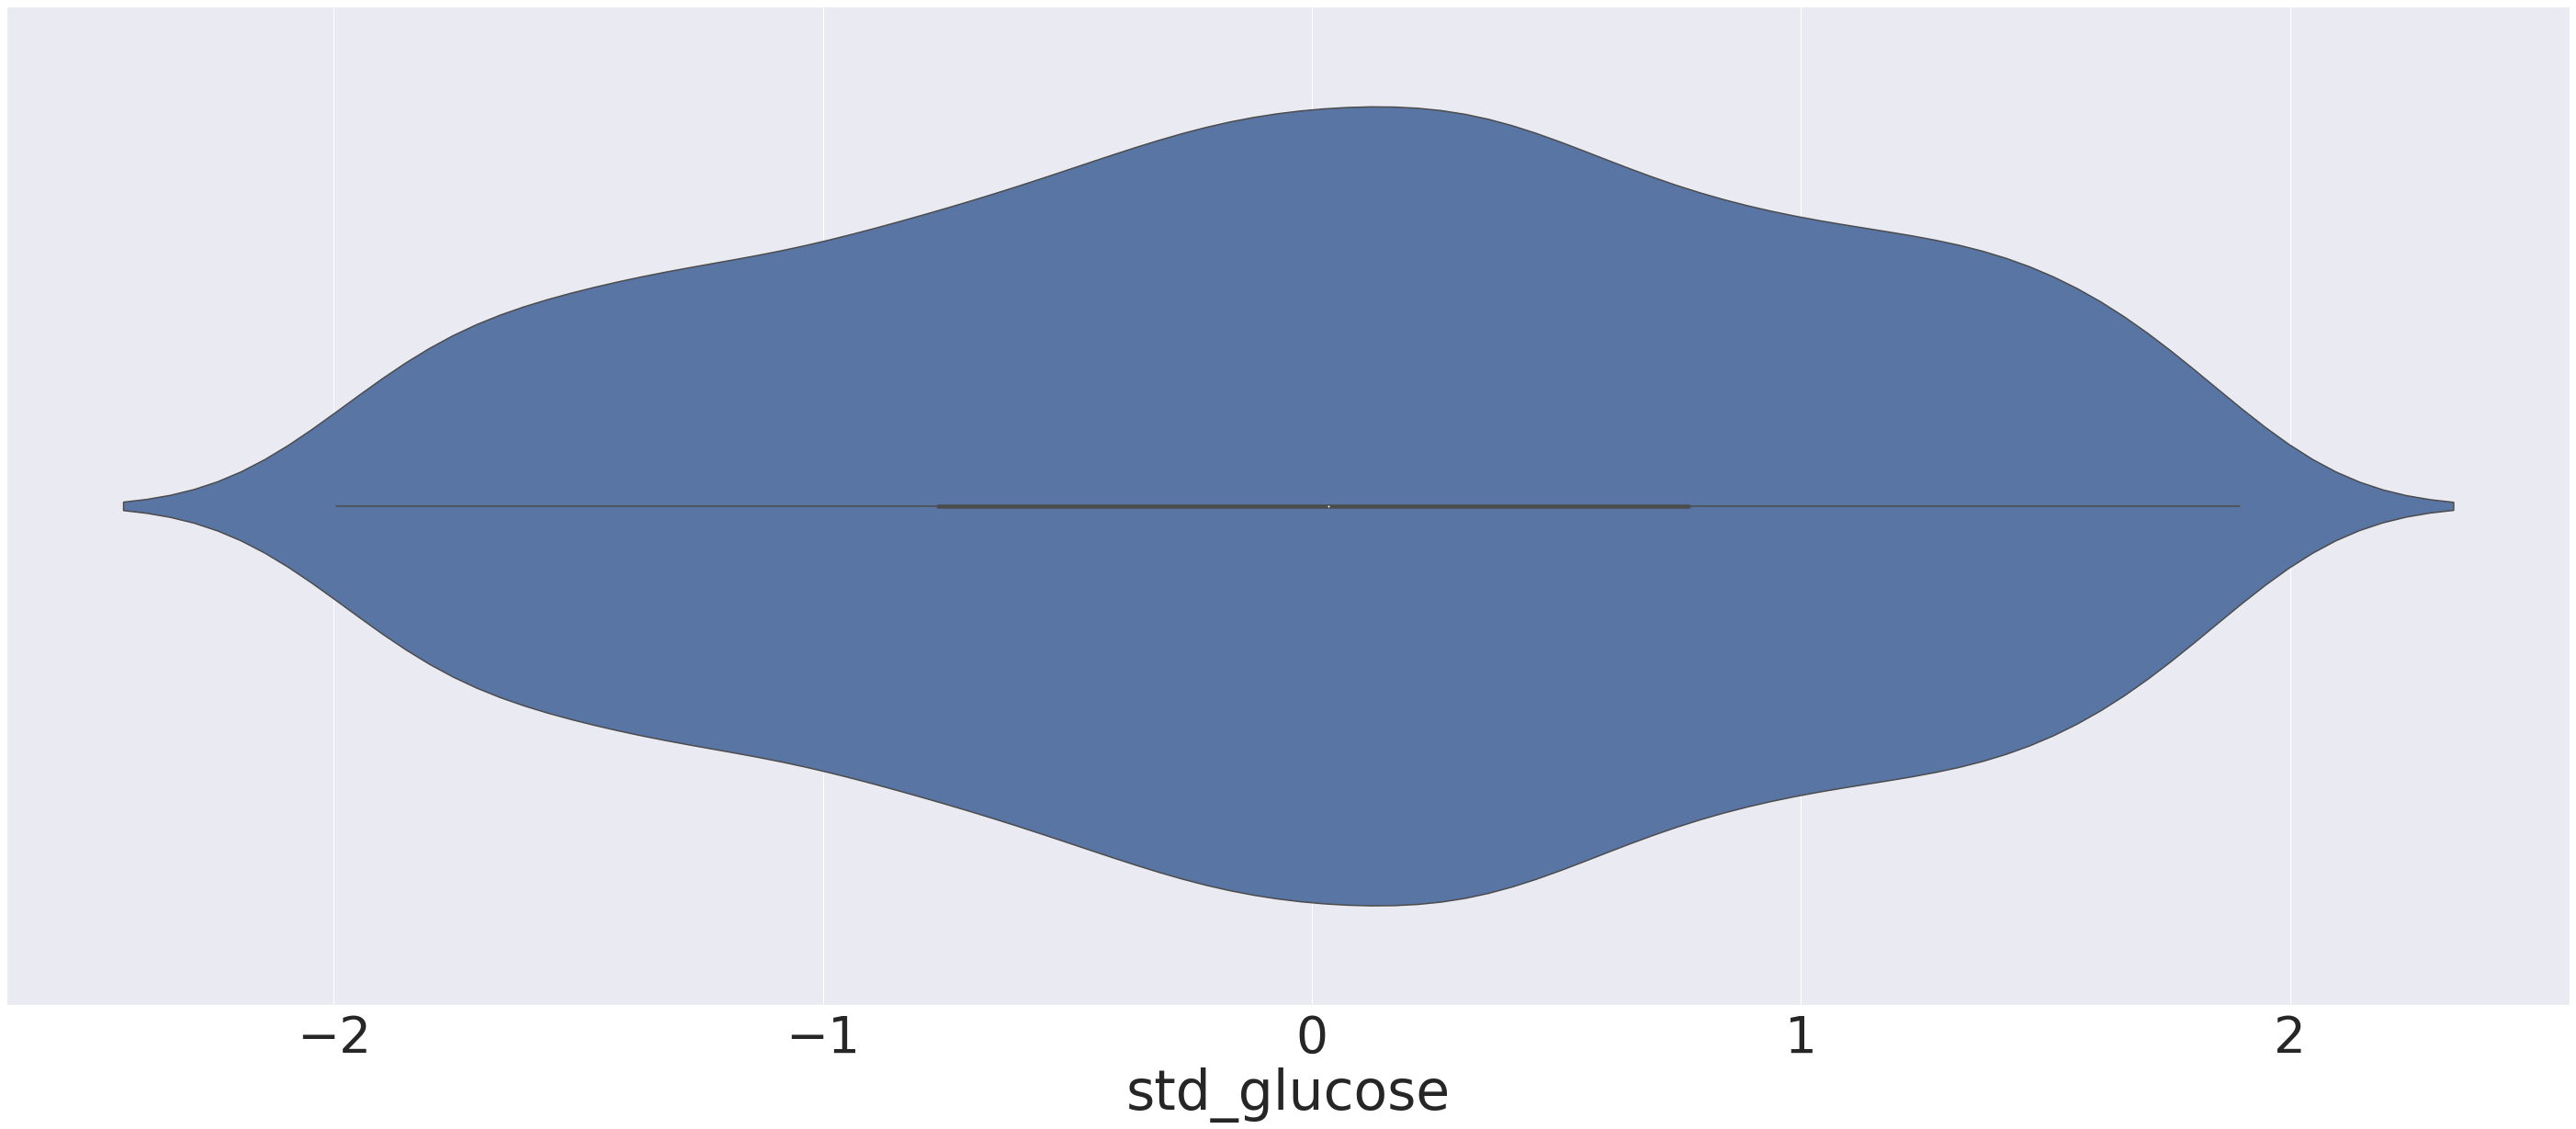

In [ ]:
ax = sns.violinplot('std_glucose', data=df_train_normilize)

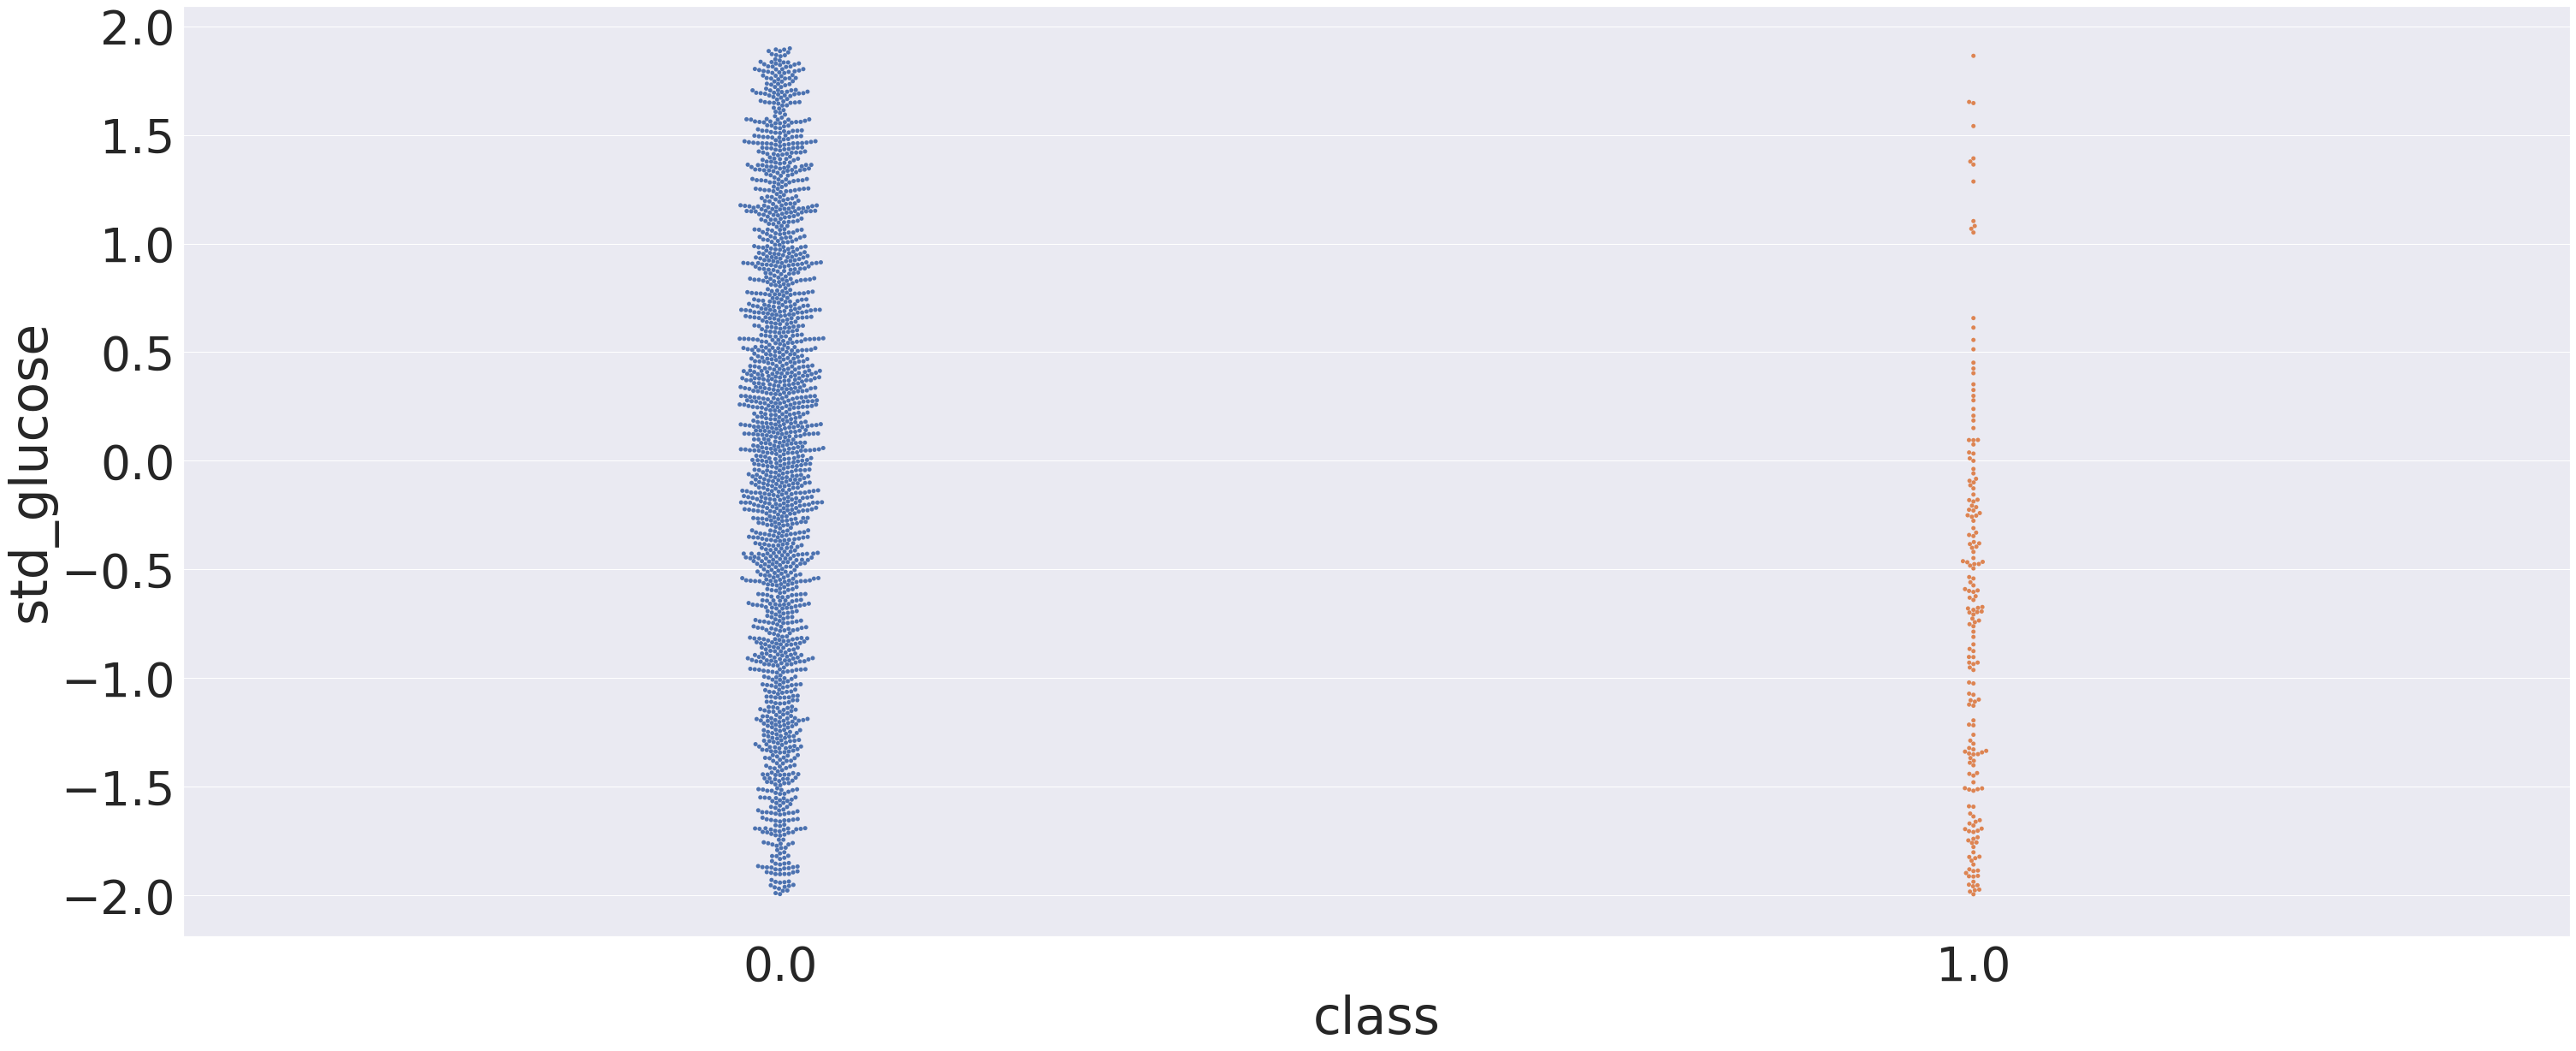

In [ ]:
plt.rcParams["figure.figsize"] = (50,20)
sns.set(font_scale=5) 
swarm = sns.swarmplot(x="class", y="std_glucose", data=df_train_normilize)

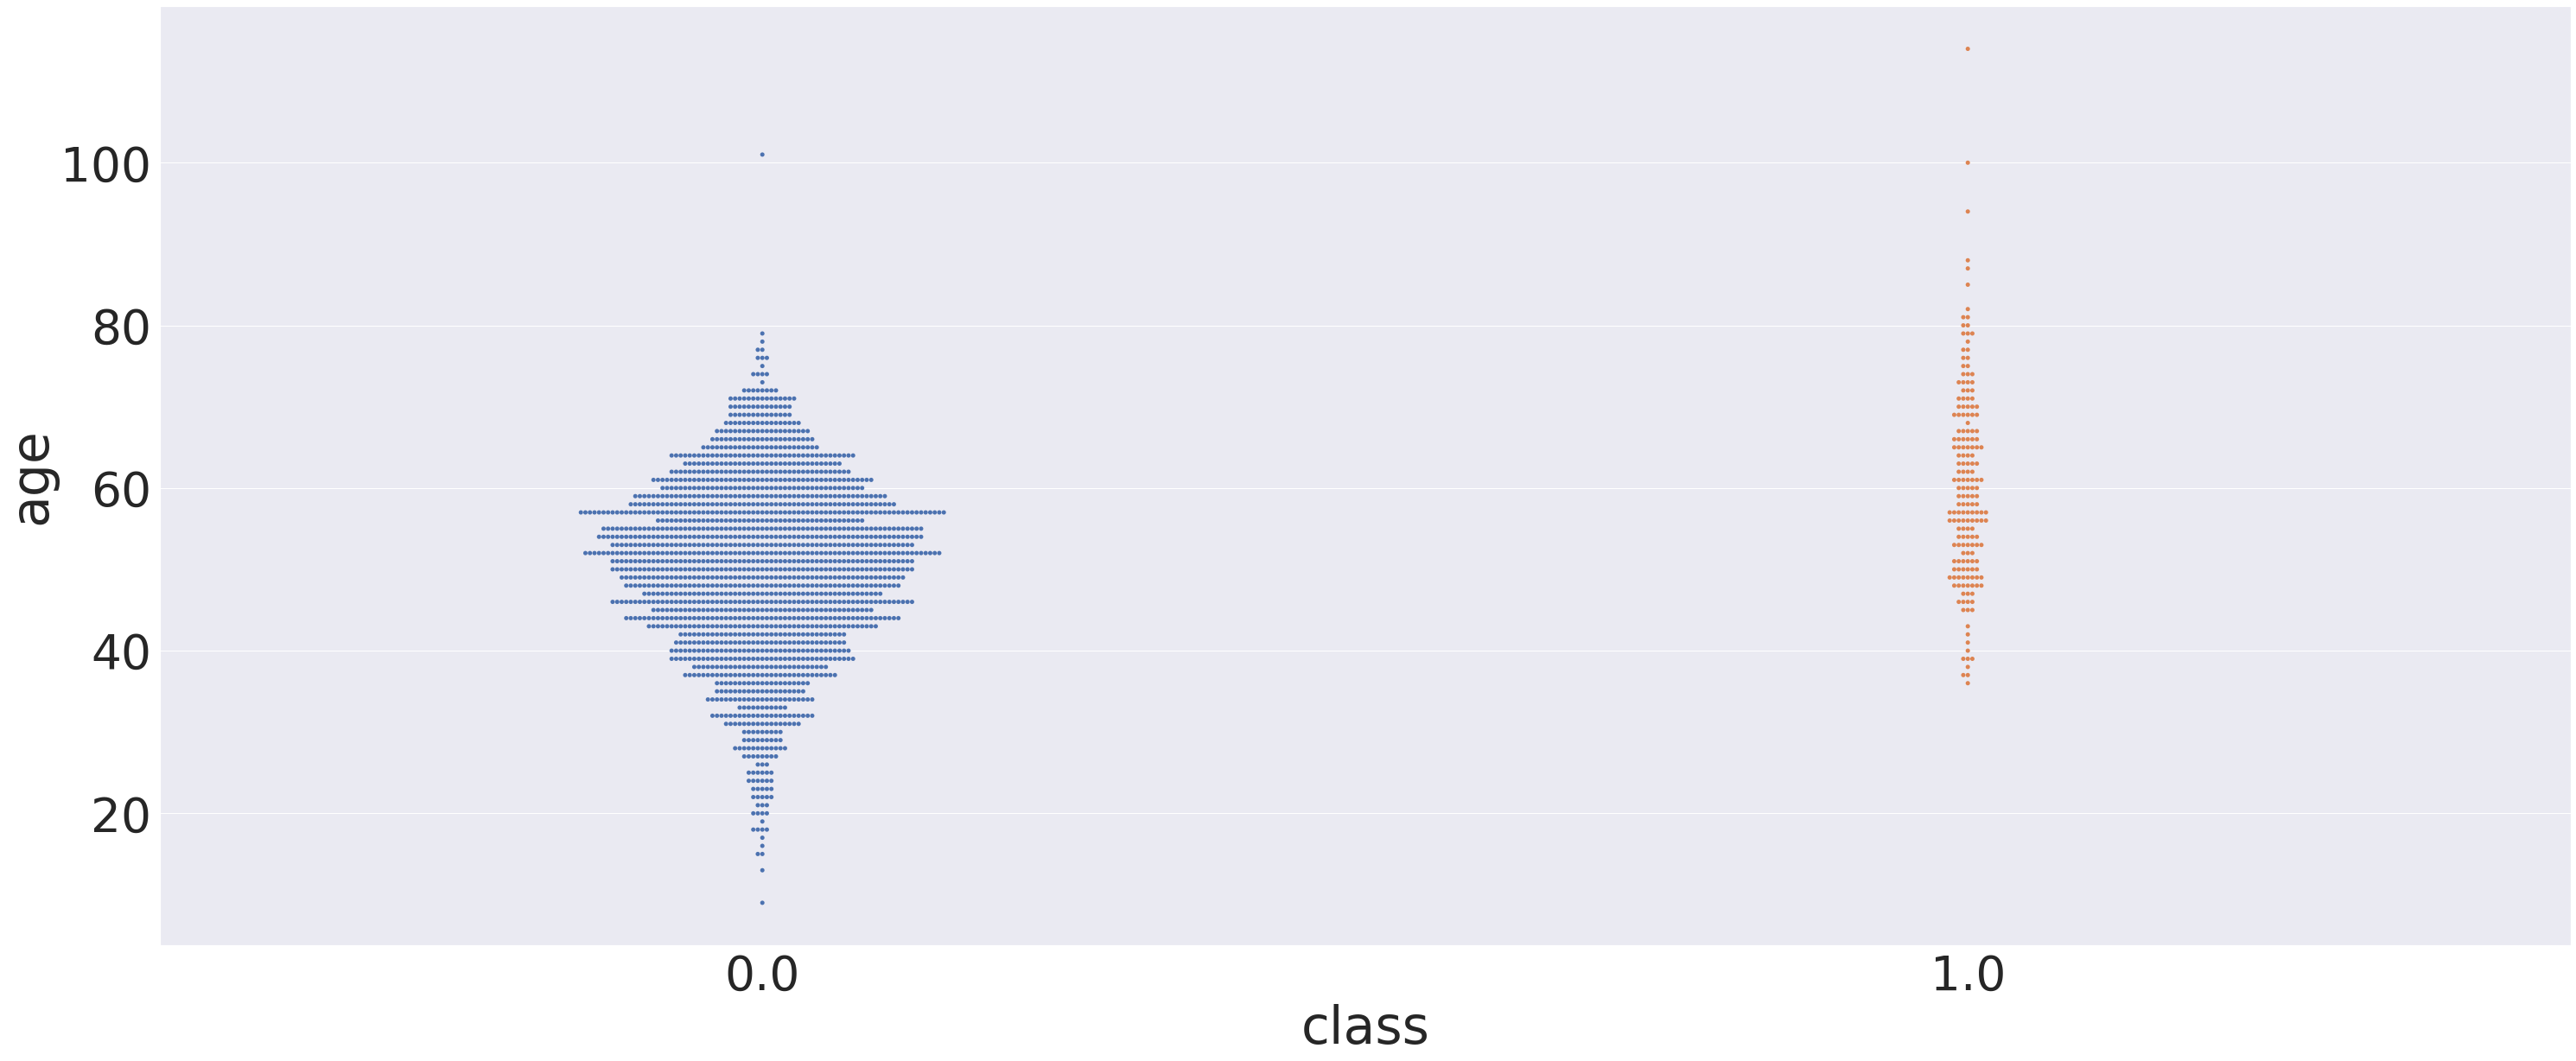

In [ ]:
plt.rcParams["figure.figsize"] = (50,20)
sns.set(font_scale=5) 
swarm = sns.swarmplot(x="class", y="age", data=df_train_normilize)

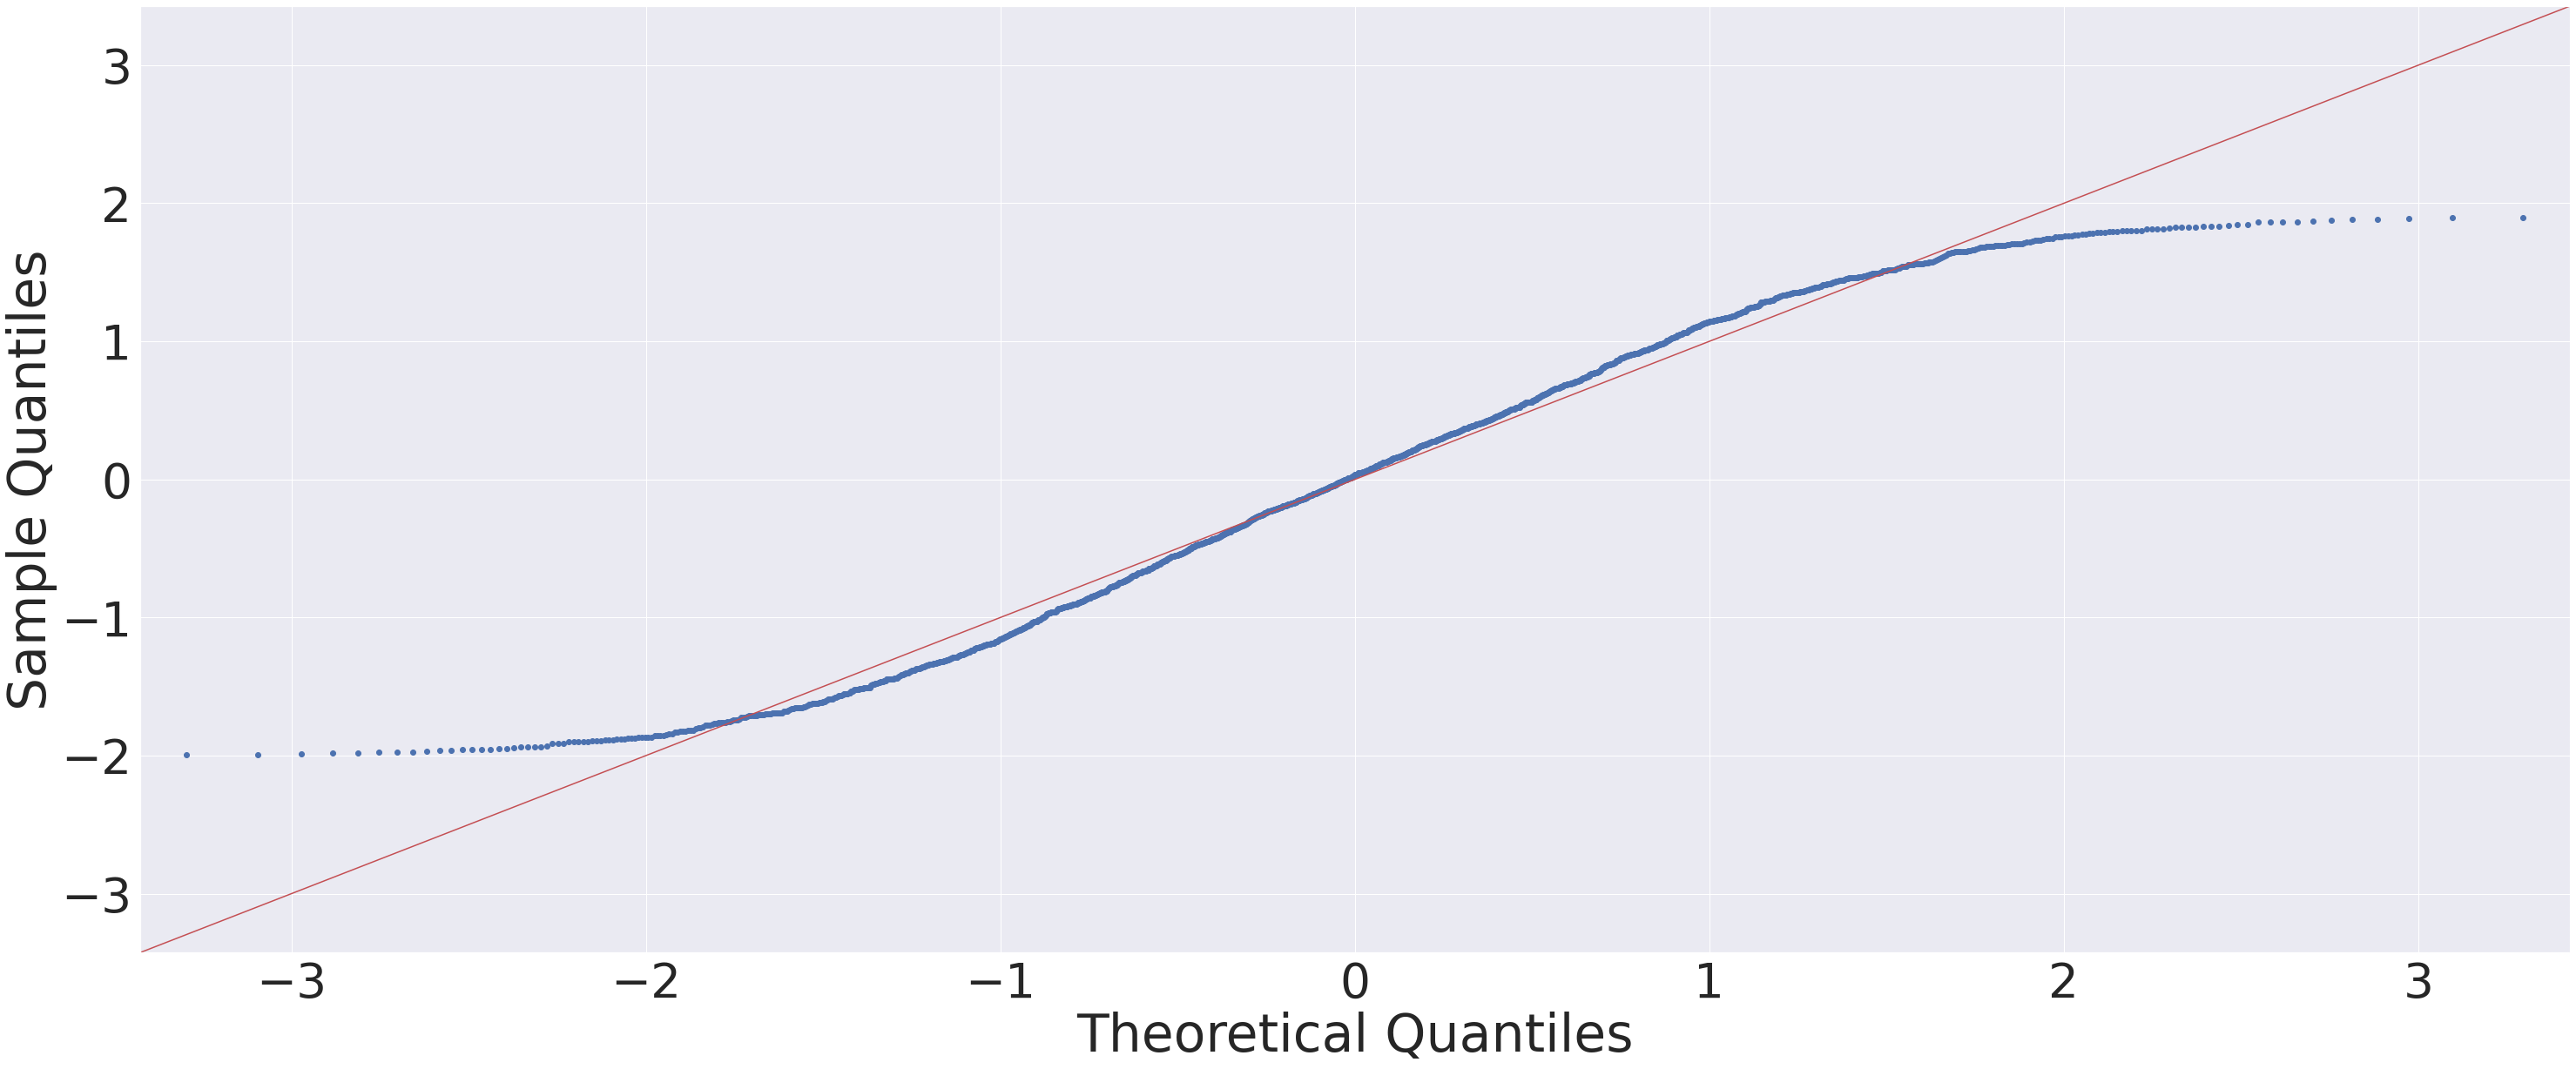

In [ ]:
_ = sm.ProbPlot(df_train_normilize.std_glucose, fit=True).qqplot(line='45')

In [ ]:
df_train_normilize[["std_glucose", "class"]].corr()


,std_glucose,class
std_glucose,1.000000,-0.228671
class,-0.228671,1.000000


In [ ]:
df_train_normilize[["std_oxygen", "class"]].corr()

,std_oxygen,class
std_oxygen,1.000000,0.297739
class,0.297739,1.000000


#### At the folowing two plots we can see how strong the presence of the disease depends on std_glucose and std_oxygen

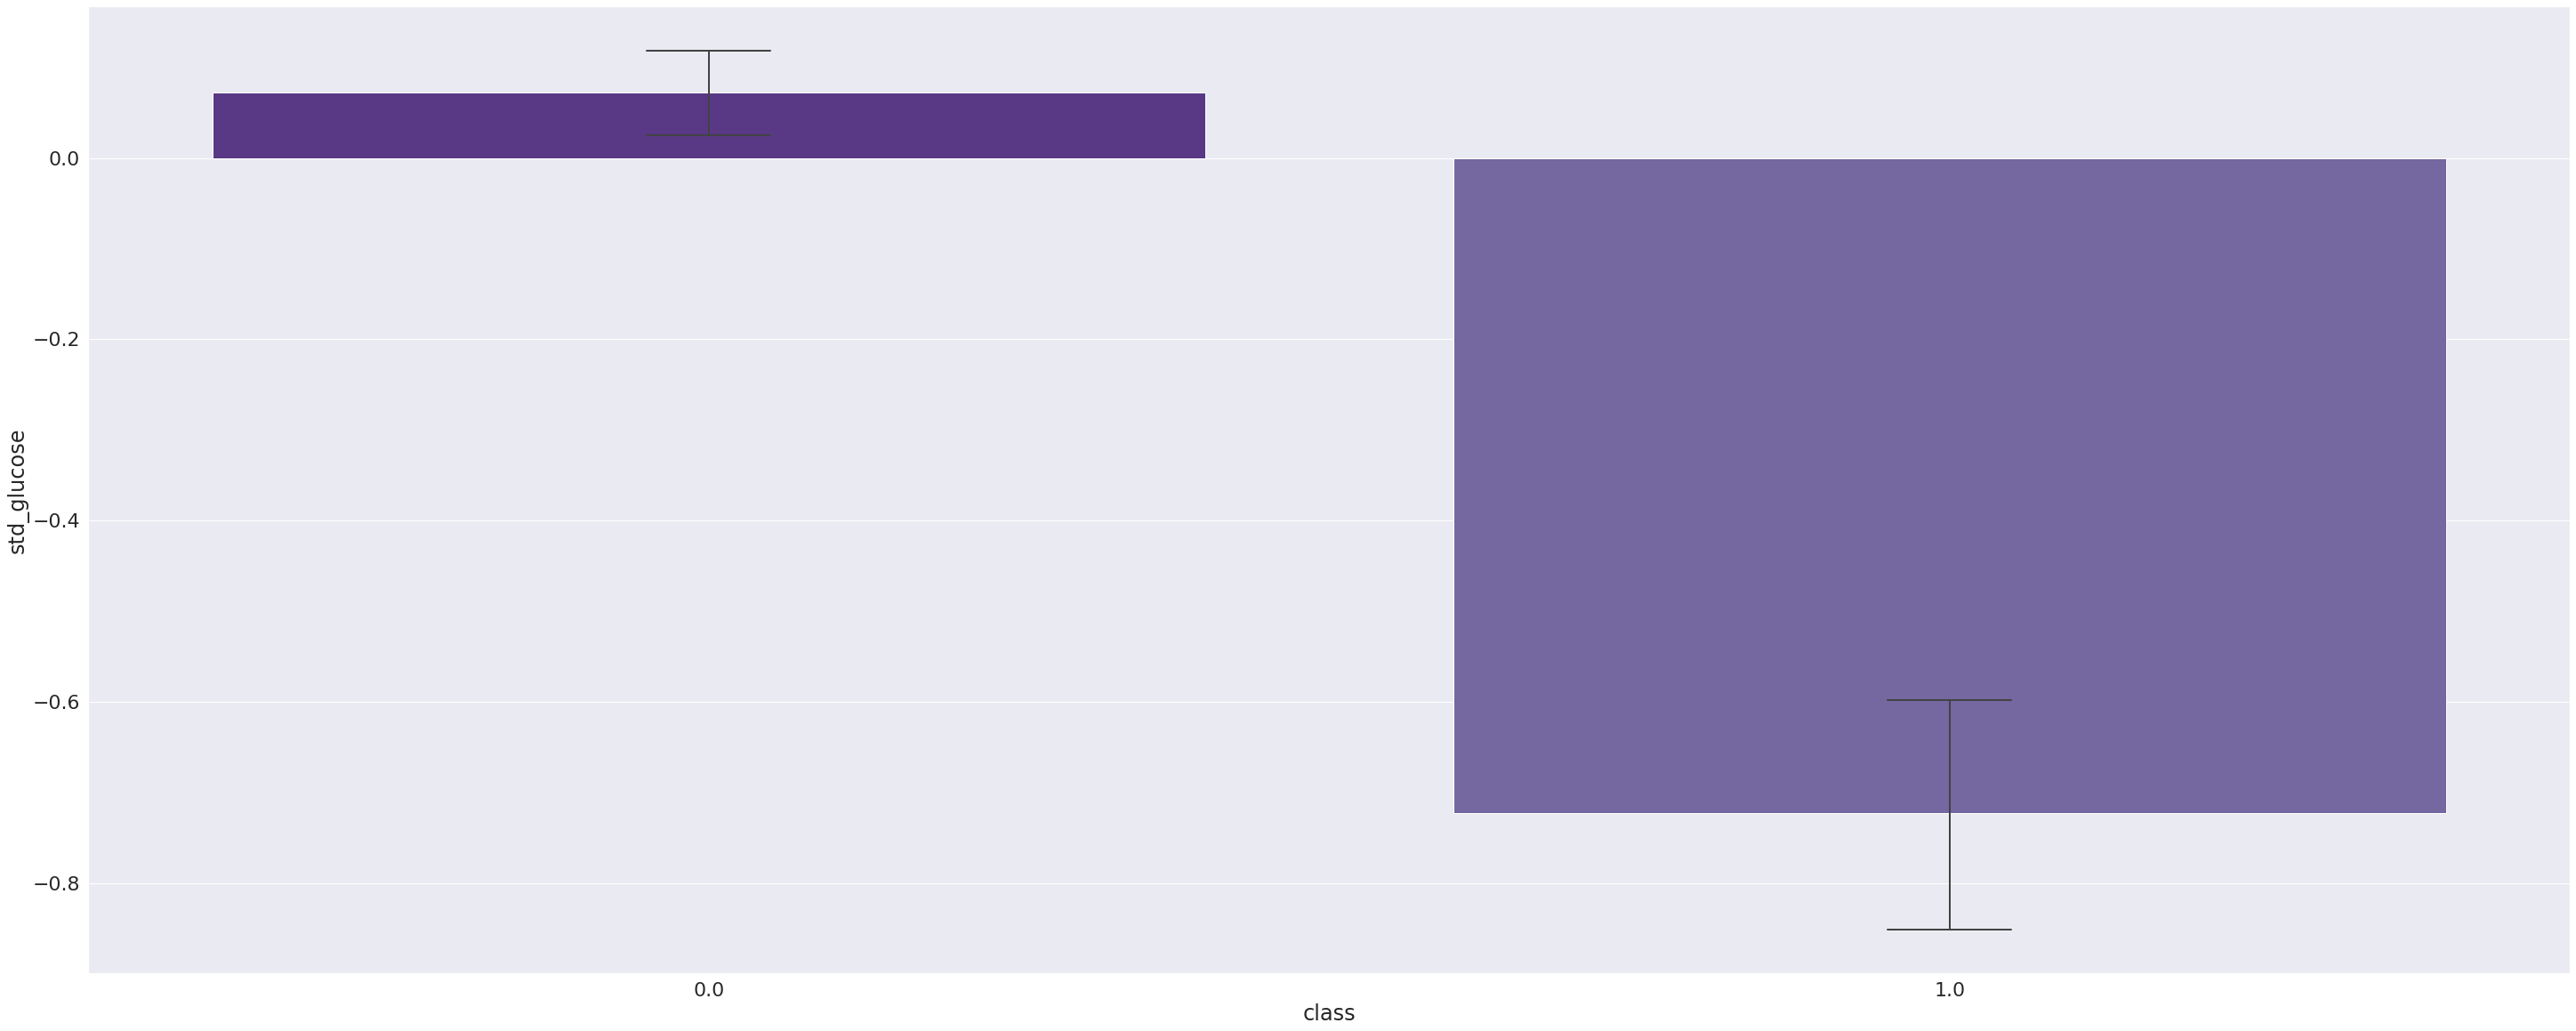

In [ ]:
sns.set(font_scale=2)
sns.barplot(x='class', y='std_glucose', data=df_train_normilize,capsize=0.1, errwidth=2, palette=sns.color_palette("Purples_r"))

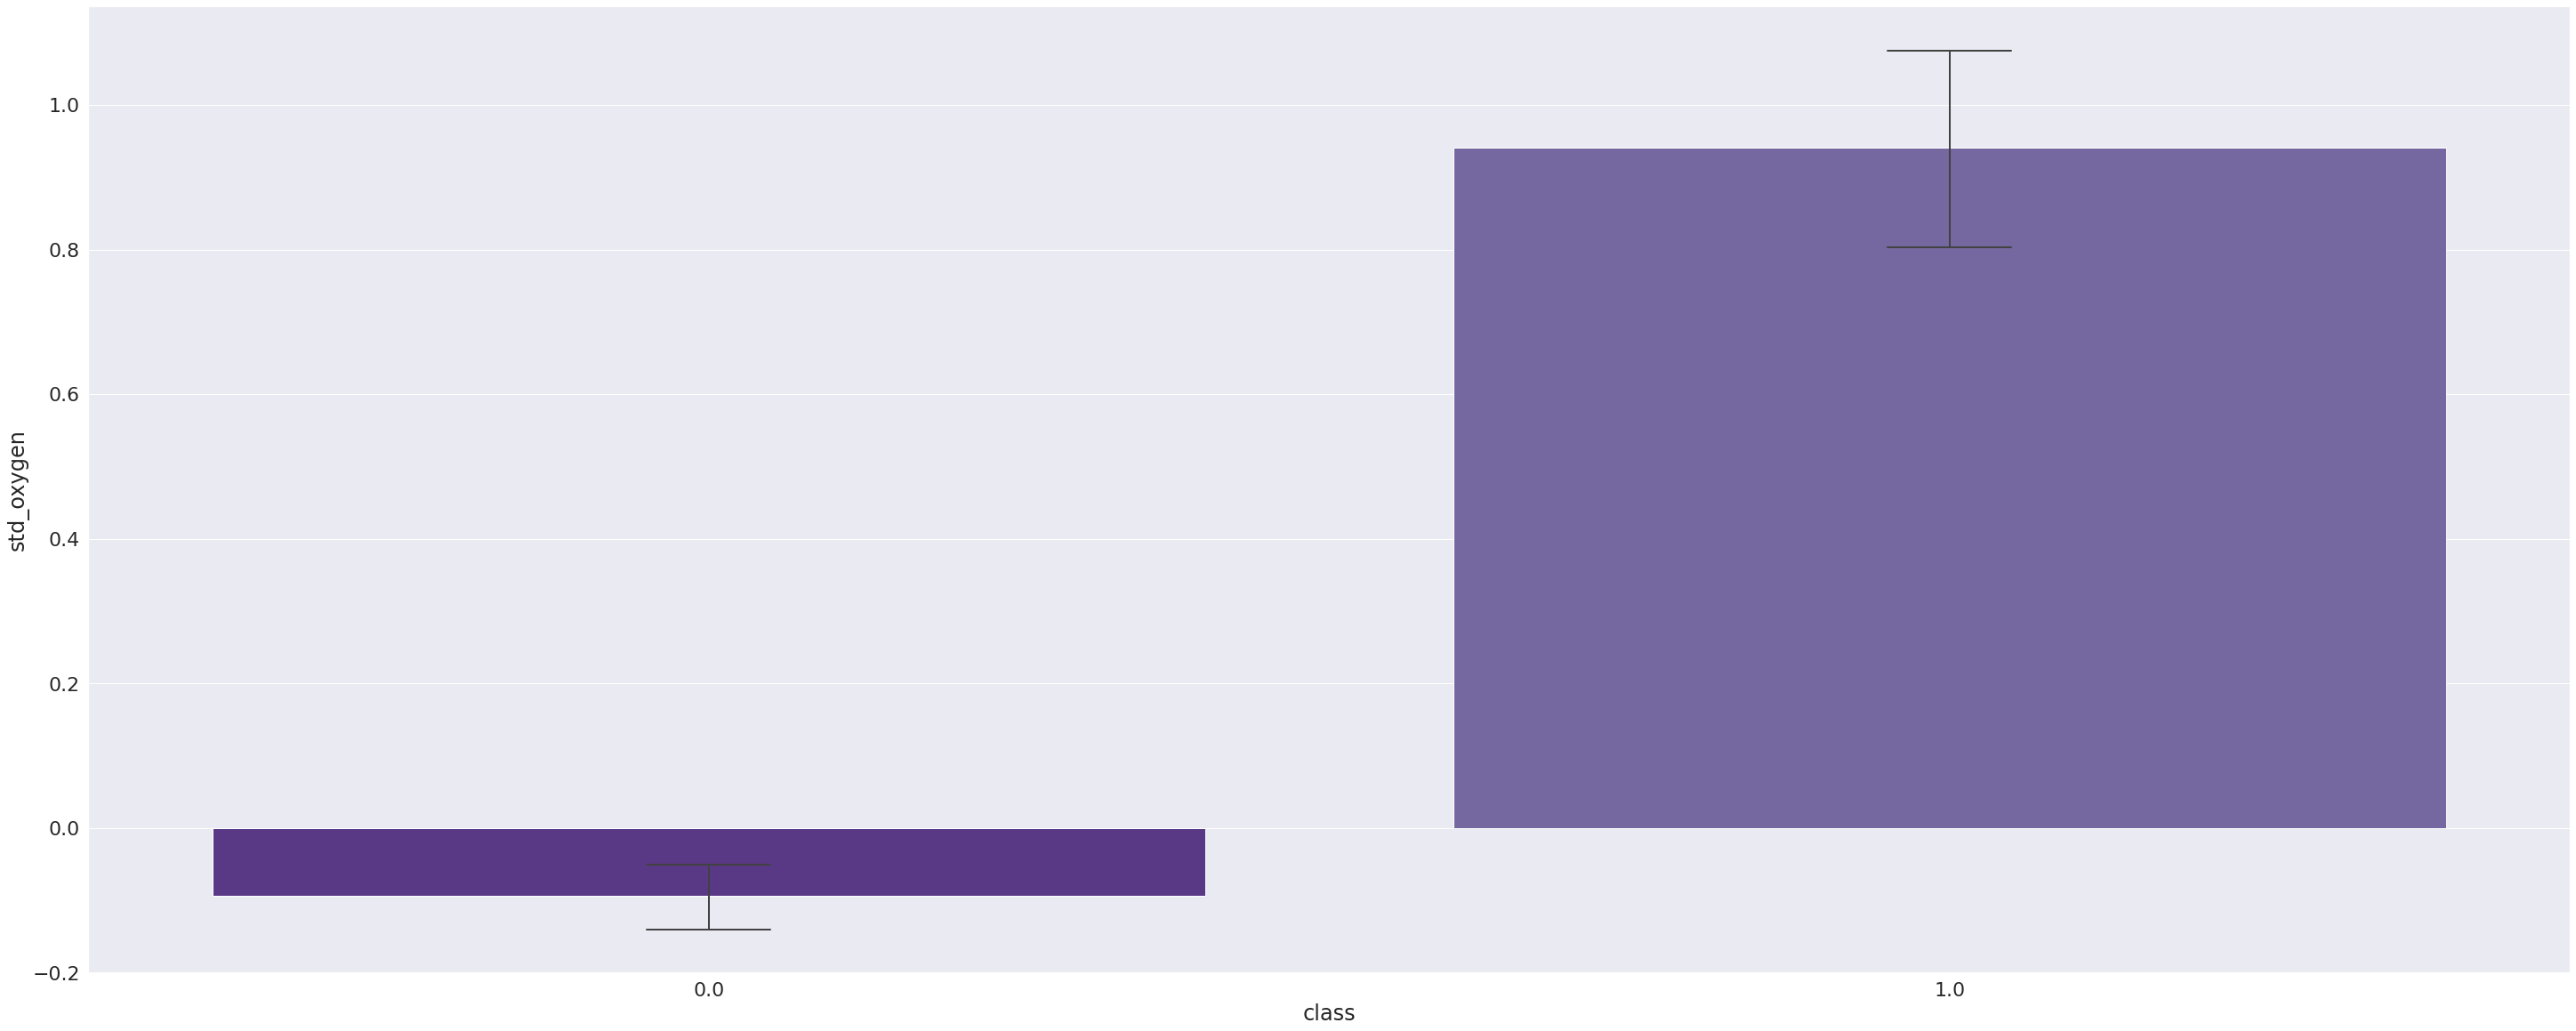

In [ ]:
sns.set(font_scale=2)
sns.barplot(x='class', y='std_oxygen', data=df_train_normilize,capsize=0.1, errwidth=2, palette=sns.color_palette("Purples_r"))